## Summary

<p>
The goal of this project is to predict the default or payback of loans given from lenders
to borrowers via the <a href="https://www.lendingclub.com/">LendingClub</a>
</p> 

<p>
According to <a href="https://en.wikipedia.org/wiki/Lending_Club">Wikipedia</a> "LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.LendingClub is the world's largest peer-to-peer lending platform." The lending club loan data set can be downloaded from their site or from
<a href="https://www.kaggle.com/wordsforthewise/lending-club">Kaggle</a>.
</p> 

<p>
This project in applies the full data science life cylce from data exploration, 
data cleaning, feature selection, data preprocessing and machine learning. These methods are
applied:
</p>

<ul>

<li>data import</li>
<li><b>data exploration</b></li>
<li>statistics</li>
<li>data aggregation</li>
<li>data visualization</li>
<li><b>data cleaning</b></li>
<li>imputing missing values <br>
    with median and random values</li>
<li><b>convert features to numeric</b></li>
<li>string manipulation</li>
<li>label encoding</li>
<li>one-hot-encoding</li>
<li>frequency encoding</li>
<li>datetimes</li>
<li><b>data preprocessing</b></li>
<li>feature selection on ground of <br>
    completeness, meaning, multicollinearity</li>
<li>feature scaling</li>  
<li><b>data partitioning</b></li>
<li>train-test-split</li>
<li>cross validation</li>
<li>kfold</li>
<li><b>data modeling</b></li> 
<li>GridSearch cross validation</li>
<li>Principal component analysis (PCA)</li>
<li>LogisticRegression</li>
<li>RandomForest</li>
<li>K NearestNeighbors</li>
<li>GaussianNB</li> 
<li>Multi-Layer-Perceptron</li> 
<li>hyper parameter tuning</li> 
<li><b>model evaluation</b></li>
<li>accuracy score</li>
<li>cross validation score</li>    

</ul>
    
<p>
Comments are and explanations are given within the coding.
A conclusion is made at the end.
</p> 



#### Working directory

In [266]:
import os 
dirpath = os.getcwd()
foldername = os.path.basename(dirpath)

## Import packages

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types
from random import sample
from random import choices
import random
import warnings

import sklearn
from sklearn.pipeline import Pipeline
print("SKlearn version: ", sklearn.__version__)

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# train-test-split / cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# modeling
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



numpy version:  1.16.2
SKlearn version:  0.20.3


## Import data dictonary with explanations of the variables


In [3]:
pd.set_option('display.max_colwidth', 0)

loans_dictionary = pd.read_excel('LCDataDictionary.xlsx')
print(loans_dictionary.shape)
print(loans_dictionary.columns.to_list())
loans_dictionary = \
loans_dictionary.rename(columns={'LoanStatNew':'variable',
                                 'Description': 'explanation'})
loans_dictionary.tail()

(153, 2)
['LoanStatNew', 'Description']


,variable,explanation
148,settlement_amount,The loan amount that the borrower has agreed to settle for
149,settlement_percentage,The settlement amount as a percentage of the payoff balance amount on the loan
150,settlement_term,The number of months that the borrower will be on the settlement plan
151,NaN,NaN
152,NaN,* Employer Title replaces Employer Name for all loans listed after 9/23/2013


## Import data

In [4]:
loans = pd.read_csv('lending_club_loan_data/loan.csv', low_memory=False)

## Explore data

In [5]:
loans.shape

(2260668, 145)

In [6]:
loans_index = loans.index
print(loans_index)

RangeIndex(start=0, stop=2260668, step=1)


In [7]:
loans_names = list(loans.columns)
loans_names_sorted = sorted(loans_names)
loans_names_sorted[:10]

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util']

In [8]:
print(len(loans_names))

145


Checking data types.

In [9]:
loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes['variable'] = loans_dtypes.index
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes.drop('index', inplace=True, axis=1)
print(loans_dtypes.shape)
loans_dtypes=loans_dtypes.iloc[:,[1,0]]
print("Data types by variable:\n{} ".format(loans_dtypes.iloc[:10,:]))

(145, 2)
Data types by variable:
          variable   dtypes
0  id               float64
1  member_id        float64
2  loan_amnt        int64  
3  funded_amnt      int64  
4  funded_amnt_inv  float64
5  term             object 
6  int_rate         float64
7  installment      float64
8  grade            object 
9  sub_grade        object  


Merge datatypes with explanations from dictionary and
give an example value for each variable.

In [10]:
loans_dtypes['first value'] = loans.loc[0].values
loans_dtypes_explained = \
loans_dtypes.merge(loans_dictionary.loc[0:145,:], 
                   on='variable', how='left')


In [11]:
loans_dtypes_explained.head(3)

,variable,dtypes,first value,explanation
0,id,float64,NaN,A unique LC assigned ID for the loan listing.
1,member_id,float64,NaN,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,2500,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


There are several variables of type object. 
Those can be strings or categorical data.
Anyway Machine Learning algorithms need numeric data.
It is necessary to check, which variables are categorical data and
useful as features and then to encode these features within a data preprocessing step.

Checking variables of type object.

In [12]:
loans_object = loans.select_dtypes(include='object')
loans_object_col = loans_object.columns
print(len(loans_object_col))
print(sorted(loans_object_col ))
loans_object.iloc[0:2, 0:10]

36
['addr_state', 'application_type', 'debt_settlement_flag', 'debt_settlement_flag_date', 'desc', 'disbursement_method', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'hardship_end_date', 'hardship_flag', 'hardship_loan_status', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'initial_list_status', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'loan_status', 'next_pymnt_d', 'payment_plan_start_date', 'purpose', 'pymnt_plan', 'sec_app_earliest_cr_line', 'settlement_date', 'settlement_status', 'sub_grade', 'term', 'title', 'verification_status', 'verification_status_joint', 'zip_code']


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan
0,36 months,C,C1,Chef,10+ years,RENT,Not Verified,Dec-2018,Current,n
1,60 months,D,D2,Postmaster,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,n


There are 36 variables of type object. These maybe strings
with a categorical level of measurement.


In [13]:
loans_cat = loans.select_dtypes(include='category')
loans_cat.shape
# There are no variables explicitly coded as categorical.

(2260668, 0)

In [14]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


data_science/data_science_projects/data_camp_projects/loans/lending_club_loan_data

In [16]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Target variable

<p>
There are over 100 variables in the data set. While this can help
make better predicitions with smart feature engineering, it can be
a little bit overwhelming and it can distract from the essential research question. This research question is:
</p>    
    
<p>    
"Is the borrower going to pay back the loan given by lending club  or not? 
</p> 

<p>    
The target variable or label is the loan status column. This variables 
have more attributes than needed. For this question "Fully Paid" and 
"Charged Off" are the informative attributes. The "Default" variable
is a pre-stage of "Charged Off". 
</p>   
Lending club has made an interesting    
<a href="https://help.lendingclub.com/hc/en-us/articles/216080887-What-is-the-default-and-or-charge-off-rate-on-loans-facilitated-by-LendingClub-">post</a> to understand this variable. 





In [17]:
loans.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                919695 
Charged Off                                            261655 
Late (31-120 days)                                     21897  
In Grace Period                                        8952   
Late (16-30 days)                                      3737   
Does not meet the credit policy. Status:Fully Paid     1988   
Does not meet the credit policy. Status:Charged Off    761    
Default                                                31     
Name: loan_status, dtype: int64

Only observations with "Fully Paid" and "Charged Off" are kept.
Current for example says nothing about the final payback or not.

In [18]:
loans_payback = \
loans.loc[(loans['loan_status'] == "Fully Paid") | 
          (loans['loan_status'] == "Charged Off")]



In [19]:
loans_payback.loan_status.value_counts()

Fully Paid     1041952
Charged Off    261655 
Name: loan_status, dtype: int64

In [20]:
loans_payback.reset_index().loc[:5, ['grade', 'title', 'dti' , 'loan_status']]

,grade,title,dti,loan_status
0,D,Debt consolidation,30.46,Fully Paid
1,C,Credit card refinancing,50.53,Fully Paid
2,A,Credit card refinancing,18.92,Fully Paid
3,B,Credit card refinancing,4.64,Fully Paid
4,E,Credit card refinancing,12.37,Fully Paid
5,D,Debt consolidation,22.18,Fully Paid


In [21]:
print(loans.shape[0])
print(loans_payback.shape[0])

2260668
1303607


This reduces the number of observations in rows from 2260668
to 1303607.

In [22]:
# Check the data type
print(isinstance(loans_payback.loan_status, str))
print(isinstance(loans_payback.loan_status.iloc[1], str))
print(type(loans_payback.loan_status.iloc[1]))

False
True
<class 'str'>


In [23]:
loans_1 = loans_payback.copy()

loans_1['loan_status'] =\
loans_1.loan_status.replace('Fully Paid', 1).replace('Charged Off', 0)

compare_loan_status = \
pd.concat([loans_1['loan_status'], loans_payback['loan_status']], 
          axis=1)

print(compare_loan_status.iloc[:, 0].value_counts())
print(compare_loan_status.iloc[:, 1].value_counts())

# Encoding from string to boolean 0 or 1 was succesful

1    1041952
0    261655 
Name: loan_status, dtype: int64
Fully Paid     1041952
Charged Off    261655 
Name: loan_status, dtype: int64


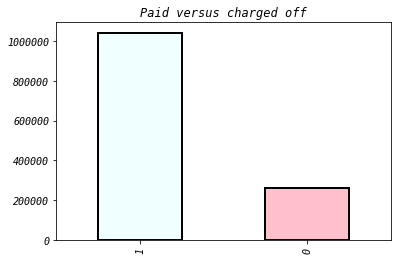

In [24]:
loans_1.loan_status.value_counts().plot.bar \
(title="Paid versus charged off", color=['azure', 'pink'], 
 edgecolor="black", linewidth=2)
# Most borrowers pay their loans back. This supports the busines model
# of Lending Club

In [25]:
correlations_with_target=\
loans_1.corr()['loan_status'].dropna().\
reset_index().rename(columns={'index':'feature'}).sort_values(by="loan_status", ascending=False).\
reset_index(drop=True)


In [26]:
print(correlations_with_target.shape)
print(correlations_with_target.head())

(102, 2)
           feature  loan_status
0  loan_status      1.000000   
1  total_rec_prncp  0.441239   
2  last_pymnt_amnt  0.350640   
3  total_pymnt      0.318482   
4  total_pymnt_inv  0.318038   


In [27]:
correlations_with_target = \
correlations_with_target[correlations_with_target.loan_status.notnull()]
correlations_with_target=correlations_with_target[1:]
print(correlations_with_target.shape)


(101, 2)


In [28]:
print(type(correlations_with_target))
topten_1=correlations_with_target.iloc[0:9]
print(topten_1)
toplast_1=correlations_with_target.iloc[correlations_with_target.shape[0]-9:]
print(toplast_1)

<class 'pandas.core.frame.DataFrame'>
                               feature  loan_status
1  total_rec_prncp                      0.441239   
2  last_pymnt_amnt                      0.350640   
3  total_pymnt                          0.318482   
4  total_pymnt_inv                      0.318038   
5  sec_app_mths_since_last_major_derog  0.157888   
6  sec_app_mort_acc                     0.140349   
7  annual_inc_joint                     0.095953   
8  bc_open_to_buy                       0.082703   
9  avg_cur_bal                          0.079835   
                                        feature  loan_status
93   sec_app_revol_util                         -0.144072   
94   sec_app_inq_last_6mths                     -0.153932   
95   hardship_payoff_balance_amount             -0.162038   
96   hardship_amount                            -0.171701   
97   orig_projected_additional_accrued_interest -0.175271   
98   hardship_dpd                               -0.240667   
99   int_rate  

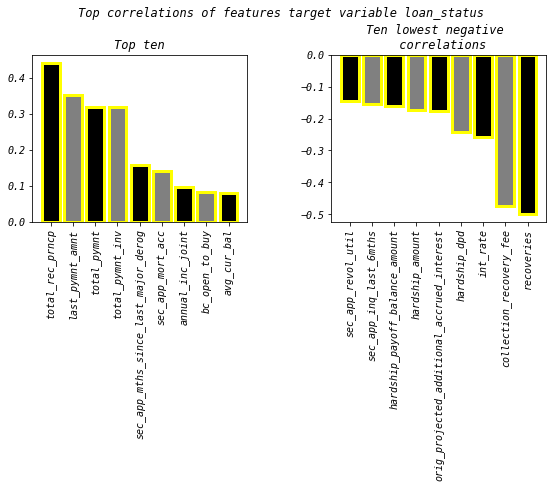

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))
plt.tight_layout(pad=5)
plt.suptitle("Top correlations of features target variable loan_status")

ax1.bar(x=topten_1.feature, height=topten_1.loan_status, edgecolor="yellow", linewidth=3,
        color=['black', "gray"])
ax1.set_title("Top ten", fontsize=12)
ax1.set_xticklabels(topten_1.feature, rotation=90)

ax2.bar(x=toplast_1.feature, height=toplast_1.loan_status, edgecolor="yellow", linewidth=3,
        color=['black', "gray"])
ax2.set_title("Ten lowest negative \n correlations", fontsize=12)
ax2.set_xticklabels(toplast_1.feature, rotation=90)

plt.show()

### Feature variables

ID'variables have in general low predictive capabilities. Those are  here erased from the data set.

In [30]:
loans_1.iloc[:, [0,1,2]].head()

,id,member_id,loan_amnt
100,NaN,NaN,30000
152,NaN,NaN,40000
170,NaN,NaN,20000
186,NaN,NaN,4500
215,NaN,NaN,8425


In [31]:
loans_1 = loans_1.drop(['id', 'member_id'], axis = 1)

#### Null values in feature variables

In [32]:
loans_1.isnull().sum()[15:25]

pymnt_plan          0      
url                 1303607
desc                1180280
purpose             0      
title               15426  
zip_code            1      
addr_state          0      
dti                 312    
delinq_2yrs         0      
earliest_cr_line    0      
dtype: int64

In [33]:
loans_1.desc.isnull().sum()

1180280

There are columns with a substantial number of null values. In some
columns the sum of null values is greater than the sum of given values.
Columns with values greater than half of total observations are erased below.


In [34]:
# half of count of values
loans_1.shape[0]/2

651803.5

In [35]:
# number of columns before cleaning
loans_1.shape[1]

143

In [36]:
# erase columns where the number of null values is greater than
# half of all observations

for col in list(loans_1.columns):
    if loans_1[col].isnull().sum() > loans_1.shape[0]/2:
        loans_1 = loans_1.drop(col, axis=1)

In [37]:
print(loans_1.shape[1])
# the number of columns after cleaning is 101

87


In [38]:
# first row of data set after dropping columns
loans_1.iloc[0,:]

loan_amnt                     30000             
funded_amnt                   30000             
funded_amnt_inv               30000             
term                           36 months        
int_rate                      22.35             
installment                   1151.16           
grade                         D                 
sub_grade                     D5                
emp_title                     Supervisor        
emp_length                    5 years           
home_ownership                MORTGAGE          
annual_inc                    100000            
verification_status           Source Verified   
issue_d                       Dec-2018          
loan_status                   1                 
pymnt_plan                    n                 
purpose                       debt_consolidation
title                         Debt consolidation
zip_code                      917xx             
addr_state                    CA                
dti                 

#### Erasing additional columns from the data frame?




loan_amnt, funded_amnt

Explanations of the first three variables of the revised 
data frame.

 <table style="width:100%">
  <tr>
    <th>Variable</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>loan_amnt </td>
    <td>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>

  </tr>
  <tr>
    <td>funded_amnt</td>
    <td>
The total amount committed to that loan at that point in time.</td>
  </tr> 
  <tr>
    <td>funded_amnt_inv</td>
    <td>
The total amount committed by investors for that loan at that point in time.</td>
  </tr>
    
</table> 



In [39]:
loans_1.iloc[:3, [0,1,2,3]]

,loan_amnt,funded_amnt,funded_amnt_inv,term
100,30000,30000,30000.0,36 months
152,40000,40000,40000.0,60 months
170,20000,20000,20000.0,36 months


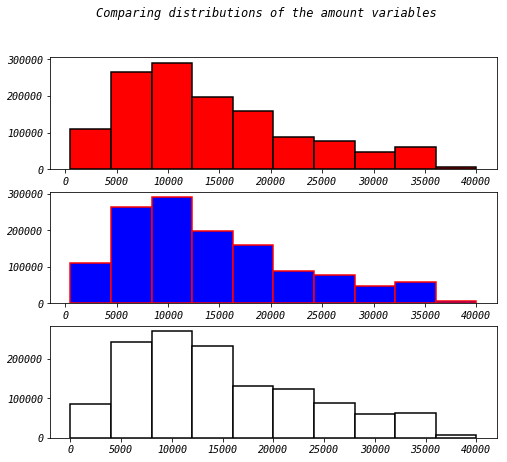

In [40]:
fig, ax = plt.subplots(3, figsize=(8,7))
plt.suptitle("Comparing distributions of the amount variables")
ax[0].hist(loans_1.loan_amnt, color="r", edgecolor="black", 
           linewidth="1.5")
ax[1].hist(loans_1.funded_amnt, color="b", edgecolor="red", linewidth="1.5")
ax[2].hist(loans_1.funded_amnt_inv, color="white", edgecolor="black",
           linewidth="1.5")
plt.show()

# The distributions look very similar. Does this mean the variables 
# contain the similar information?


In [41]:
# Count of difference between loan_amount and funded amount
loans_1.query('loan_amnt != funded_amnt').shape[0]

1921

These variables are highly correlated and are leaking information from
the future. For this reason only loan amount is maintained.

In [42]:
loans_1.drop(['funded_amnt_inv', 'funded_amnt'], axis = 1, inplace=True)

#### emp_title, emp_length

 <table style="width:100%">
  <tr>
    <th>Variable</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>emp_title</td>
    <td>
The job title supplied by the Borrower when applying for the loan.*
  </tr>
  <tr>
    <td>emp_length</td>
    <td>
Employment length in years. Possible values are between 0 and 10 
where 0 means less than one year and 10 
means ten or more years. </td>
  </tr> 

    
</table> 

In [43]:
loans_1.reset_index().loc[:5, ['emp_title', 'emp_length']]                           

,emp_title,emp_length
0,Supervisor,5 years
1,Assistant to the Treasurer (Payroll),< 1 year
2,Teacher,10+ years
3,Accounts Examiner III,10+ years
4,Senior Director Risk Management,3 years
5,Front office Lead,4 years


In [44]:
pd.Series(pd.unique(loans_1['emp_title'])).count()
# The number of unique job titles seems rather high

371435

In [45]:
emp_title_1 = loans_1.emp_title.value_counts()
print(emp_title_1.head(10))
print(emp_title_1.shape[0])
print(emp_title_1.tail(10))
# A categorization of the job titles is difficult and
# it is not clear if there are different titles for the same task

Teacher             20496
Manager             18704
Owner               9803 
Registered Nurse    8477 
RN                  8253 
Supervisor          8012 
Driver              7230 
Sales               7213 
Project Manager     6154 
Office Manager      5345 
Name: emp_title, dtype: int64
371435
Diagnostic imaging tech                  1
Corp Quality Systems Mgr                 1
EMCOR Government Services                1
CSUCI                                    1
Director of Child Welfare                1
National Products and Systems Trainer    1
Nava Counseling Services                 1
Senior Corporate Account Executive       1
Head Age Group Coach                     1
VP communications                        1
Name: emp_title, dtype: int64


In [46]:
# The job title column is therefore dropped.
loans_1 = loans_1.drop('emp_title', axis=1)

Employment length is normally a factor for creditworthiness.
However the values in the variable do not match the explanation.
The values are not numerical.

In [47]:
len(loans_1['emp_length'].unique())

12

In [48]:
loans_1['emp_length'].value_counts()

10+ years    428547
2 years      117820
< 1 year     104550
3 years      104200
1 year       85677 
5 years      81623 
4 years      78029 
6 years      60933 
8 years      59125 
7 years      58145 
9 years      49504 
Name: emp_length, dtype: int64

Removing string elements from the values.

In [49]:
empl_1 = loans_1['emp_length']
empl_1 = \
empl_1.str.replace('years', '').str.replace('<','')
empl_1 = \
empl_1.str.replace('year','').str.replace('+','').str.strip()

print(empl_1.value_counts())
print(type(empl_1))
print(type(empl_1.iloc[3]))

10    428547
1     190227
2     117820
3     104200
5     81623 
4     78029 
6     60933 
8     59125 
7     58145 
9     49504 
Name: emp_length, dtype: int64
<class 'pandas.core.series.Series'>
<class 'str'>


In [50]:
print(empl_1.isnull().sum())

75454


In [51]:
# replace nan values and change dtype to int

empl_2 = empl_1.copy()

empl_2  = empl_2 .fillna(0)
empl_2  = empl_2 .astype('int32')

print(isinstance(empl_2 , int))
print(empl_2.dtype)
print(type(empl_2.iloc[4]))

False
int32
<class 'numpy.int32'>


In [52]:
loans_1['emp_length'] = empl_2 
print(loans_1.reset_index().loc[1000:1005,'emp_length'])

1000    1 
1001    10
1002    10
1003    1 
1004    2 
1005    10
Name: emp_length, dtype: int32


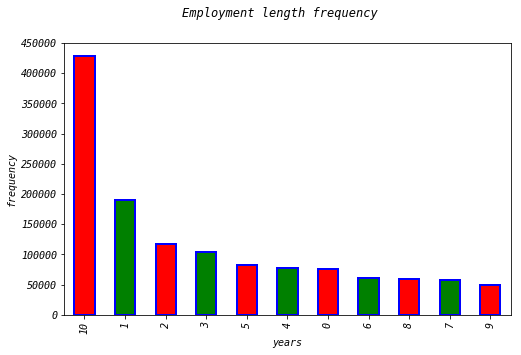

In [53]:
fig, ax = plt.subplots(1, figsize=(8,5))
plt.suptitle("Employment length frequency")
loans_1['emp_length'].value_counts().plot(kind='bar', ax=ax, 
                                          color=['red', 'green'],
                                          edgecolor="b", linewidth="2")
ax.set_xlabel("years")
ax.set_ylabel("frequency")
plt.show()

# 10 years or more is the most common value

#### verification_status, verified_status_joint


 <table style="width:100%">
  <tr>
    <th>Variable</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>verification_status</td>
    <td>
Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
</td>

  </tr>
  <tr>
    <td> verified_status_joint</td>
    <td>
Indicates if income was verified by LC, not verified, or if the income source was verified</td>
  </tr> 
 
    
</table> 


In [54]:
# the variable verification_status_joint was erased because of too
# many null values
loans.verification_status_joint.isnull().sum()

2144938

In [55]:
loans_2 = loans_1.copy()

In [56]:
print(loans_2.verification_status.unique())
print(loans_2.verification_status.value_counts())
loans_2.verification_status.isnull().sum()

['Source Verified' 'Verified' 'Not Verified']
Source Verified    503726
Verified           407676
Not Verified       392205
Name: verification_status, dtype: int64


0

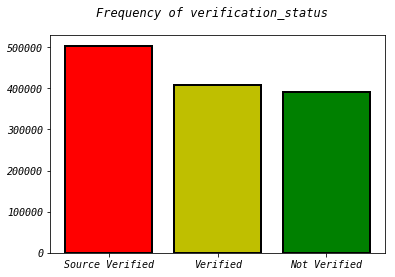

In [57]:
fig, ax = plt.subplots(1)
plt.suptitle("Frequency of verification_status")
ax.bar(x=loans_2.verification_status.unique(),
       height=loans_2.verification_status.value_counts(),
       color=['r',"y",'g'], edgecolor="black", linewidth=2)
plt.show()

In [58]:
loans_2.verification_status.dtype
# 'O' (Python) objects
print(type(loans_2.verification_status.iloc[4]))
isinstance(loans_2.verification_status, object)

<class 'str'>


True

This variable is categorical. Machine learning algorithms can only
read numerical data. The attributes of this variable must be turned
into numbers. This process is called "encoding" and belong
to the data preprocessing step in the data science workflow.

#### Preprocessing: turning verification_status into a numerical variable using label & one hot encoder and pd. concat.

In [59]:
veri_1 = list(loans_2.verification_status)
print(type(veri_1))

<class 'list'>


In [60]:
le = LabelEncoder()
le.fit(veri_1)
le.classes_

array(['Not Verified', 'Source Verified', 'Verified'], dtype='<U15')

In [61]:
veri_2 = le.transform(veri_1)
print(np.unique(veri_2))
print(len(veri_2))
print(len(veri_1))
print(type(veri_2[2]))

[0 1 2]
1303607
1303607
<class 'numpy.int64'>


In [62]:
loans_2.verification_status = veri_2
print(loans_2.verification_status[100:110])
print(type(loans_2.verification_status.iloc[5]))

5206    2
5252    1
5335    1
5349    0
5378    2
5417    0
5515    1
5524    0
5623    0
5652    1
Name: verification_status, dtype: int64
<class 'numpy.int64'>


In [63]:
ohe = OneHotEncoder(sparse=False ) 
ohe

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [64]:
ohe.get_params

<bound method BaseEstimator.get_params of OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)>

In [65]:
veri_ohe = ohe.fit_transform(np.asarray(veri_1).reshape(-1, 1))

In [66]:
veri_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [67]:
print(veri_ohe.shape)
print(loans_2.shape)

(1303607, 3)
(1303607, 84)


In [68]:
df_veri = pd.DataFrame({'ohe_1':veri_ohe[:,0],
                        'ohe_2': veri_ohe[:,1],
                        'ohe_3':veri_ohe[:,2]})

print(df_veri.head(5))

   ohe_1  ohe_2  ohe_3
0  0.0    1.0    0.0  
1  0.0    0.0    1.0  
2  1.0    0.0    0.0  
3  1.0    0.0    0.0  
4  0.0    0.0    1.0  


In [69]:
loans_3 = pd.concat([loans_2.reset_index(),
                     df_veri.reset_index()], axis=1)
print(loans_3.shape)


(1303607, 89)


In [70]:
for name in ('verification_status', 'ohe_1', 'ohe_2', 'ohe_3'):
    if name in loans_3.columns:
        print("found", name)

found verification_status
found ohe_1
found ohe_2
found ohe_3


In [71]:
loans_ohe = \
loans_3.loc[:, ['verification_status', 'ohe_1', 'ohe_2', 'ohe_3']]
loans_ohe.head()

,verification_status,ohe_1,ohe_2,ohe_3
0,1,0.0,1.0,0.0
1,2,0.0,0.0,1.0
2,0,1.0,0.0,0.0
3,0,1.0,0.0,0.0
4,2,0.0,0.0,1.0


The one hot encoded array was successfully inserted back into
the data frame. Checking the first lines the values match.
In line 1 verification status is 2 and ohe_3 is 1, while ohe_1 and
ohe_2 are 0.

In [72]:
loans_3=loans_3.drop('verification_status', axis=1)


Multicolinearity and the dummy variable threat is avoided by deleting one of the three columns
from the set.

In [73]:
loans_3 = loans_3.drop('ohe_3', axis=1)

In [74]:
if "verification_status" in loans_3.columns:
    print("found")
else:
    print("not found")

not found


In [75]:
loans_3 = loans_3.drop('index', axis=1)
loans_3.head(2)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ohe_1,ohe_2
0,30000,36 months,22.35,1151.16,D,D5,5,MORTGAGE,100000.0,Dec-2018,...,0.0,527120.0,98453.0,28600.0,101984.0,N,Cash,N,0.0,1.0
1,40000,60 months,16.14,975.71,C,C4,1,MORTGAGE,45000.0,Dec-2018,...,0.0,344802.0,161720.0,45700.0,167965.0,N,Cash,N,0.0,0.0


"verification_status" was successfully removed from the data frame.
Instead the ohe columns are kept.

In [76]:
ohe.get_params

<bound method BaseEstimator.get_params of OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)>

In [77]:
ohe.get_feature_names

<bound method OneHotEncoder.get_feature_names of OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)>

#### grade

In [78]:
loans_3.iloc[:3, [2,3, 5,6,8]]

,int_rate,installment,sub_grade,emp_length,annual_inc
0,22.35,1151.16,D5,5,100000.0
1,16.14,975.71,C4,1,45000.0
2,7.56,622.68,A3,10,100000.0


In [79]:
loans_dtypes_explained[(loans_dtypes_explained.variable == "grade") | 
                       (loans_dtypes_explained.variable == "sub_grade") |
                       (loans_dtypes_explained.variable == "int_rate")]

# All values are dependent on each other but grade incorporates all.
# Grade is kept, all others are erased

,variable,dtypes,first value,explanation
6,int_rate,float64,13.56,Interest Rate on the loan
8,grade,object,C,LC assigned loan grade
9,sub_grade,object,C1,LC assigned loan subgrade


In [80]:
grade_1  = loans_3.grade.value_counts().sort_values()
grade_1_index=grade_1.index.to_list()
print(grade_1)
print(grade_1_index)

G    8951  
F    31483 
E    91570 
D    195280
A    226243
C    369928
B    380152
Name: grade, dtype: int64
['G', 'F', 'E', 'D', 'A', 'C', 'B']


In [81]:
grade_cumsum = np.cumsum(grade_1)
grade_cumsum 

G    8951   
F    40434  
E    132004 
D    327284 
A    553527 
C    923455 
B    1303607
Name: grade, dtype: int64

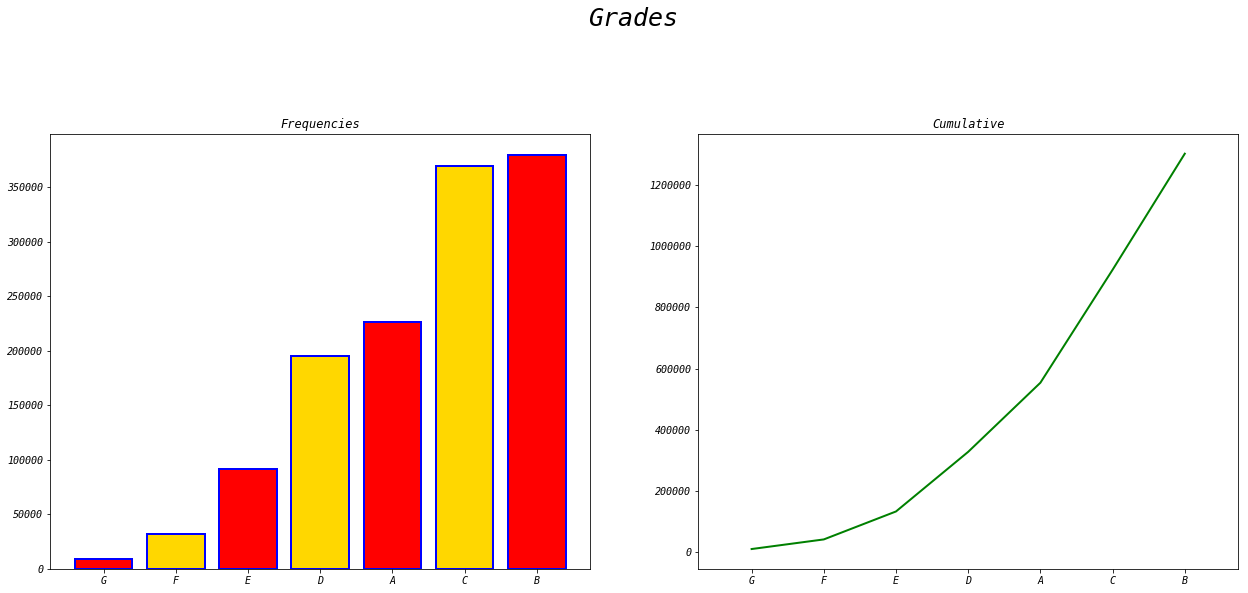

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), sharex=True)
plt.subplots_adjust(right=1.5, wspace=None, hspace=None)
plt.suptitle("Grades", horizontalalignment="center", fontsize=25,
             x=0.8, y=1.1)
ax1.bar(height=grade_1 , x=grade_1_index, color=['red', 'gold'],
       edgecolor="blue", linewidth=2)
ax1.set_title("Frequencies")
ax2.plot(grade_1_index, grade_cumsum, color='green', linewidth=2)
ax2.set_title("Cumulative")
plt.show()

In [83]:
# drop redundant variables
loans_3 = loans_3.drop(['int_rate' , 'sub_grade'], axis=1)

In [84]:
loans_dtypes_explained[19:42]

,variable,dtypes,first value,explanation
19,desc,object,NaN,Loan description provided by the borrower
20,purpose,object,debt_consolidation,A category provided by the borrower for the loan request.
21,title,object,Debt consolidation,The loan title provided by the borrower
22,zip_code,object,109xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
23,addr_state,object,NY,The state provided by the borrower in the loan application
24,dti,float64,18.24,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
25,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
26,earliest_cr_line,object,Apr-2001,The month the borrower's earliest reported credit line was opened
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,mths_since_last_delinq,float64,NaN,The number of months since the borrower's last delinquency.


In [85]:
# Redundant and data leacking columns
loans_4 = loans_3.copy()
drop_list_1 = ['zip_code' , 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv']
loans_4 = loans_4.drop(drop_list_1, axis=1)

In [86]:
loans_dtypes_explained[42:56]

,variable,dtypes,first value,explanation
42,total_rec_late_fee,float64,0,Late fees received to date
43,recoveries,float64,0,post charge off gross recovery
44,collection_recovery_fee,float64,0,post charge off collection fee
45,last_pymnt_d,object,Feb-2019,Last month payment was received
46,last_pymnt_amnt,float64,84.92,Last total payment amount received
47,next_pymnt_d,object,Mar-2019,Next scheduled payment date
48,last_credit_pull_d,object,Feb-2019,The most recent month LC pulled credit for this loan
49,collections_12_mths_ex_med,float64,0,Number of collections in 12 months excluding medical collections
50,mths_since_last_major_derog,float64,NaN,Months since most recent 90-day or worse rating
51,policy_code,int64,1,publicly available policy_code=1\nnew products not publicly available policy_code=2


In [87]:
drop_list_2 = \
['total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries',
 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']

loans_4 = loans_4.drop(drop_list_2, axis=1)
print(loans_4.shape)

(1303607, 71)


In [88]:
loans_4_cols = loans_4.columns.to_list()
loans_4_cols_sorted = sorted(loans_4_cols)
loans_4_cols_sorted[:15]

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'annual_inc',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'disbursement_method',
 'dti']

#### hardship_flag

In [89]:
print(loans_4.loc[:,'hardship_flag'].unique())
print(loans_4.loc[:, 'hardship_flag'].value_counts())

['N' 'Y']
N    1303606
Y    1      
Name: hardship_flag, dtype: int64


Only one plan where "whether or not the borrower is on a hardship plan".
This makes the variable redundant.

In [90]:
loans_4=loans_4.drop('hardship_flag', axis=1)

Are there similar columns with even only one value?

In [91]:
loans_4_unique = loans_4.apply(pd.Series.nunique).reset_index()


In [92]:
loans_4_unique = \
loans_4_unique.rename(columns={'index':'feature', 0:'n_unique'})

In [93]:
print(type(loans_4_unique))
print(loans_4_unique.head())
loans_4_unique[loans_4_unique.n_unique == 1]

<class 'pandas.core.frame.DataFrame'>
       feature  n_unique
0  loan_amnt    1553    
1  term         2       
2  installment  82574   
3  grade        7       
4  emp_length   11      


,feature,n_unique
9,pymnt_plan,1
25,policy_code,1


In [94]:
loans_4=loans_4.drop(['pymnt_plan', 'policy_code'], axis=1)

Look at the value counts of variables with unique values lower than 4.
If the frequencies of the unique values are extremly differ like in
hardship_flag variable, those variables maybe deleted.

In [95]:
for col in loans_4.columns:
    u=loans_4[col].unique()
    if len(u) < 11:
        print(loans_4[col].value_counts())
    

 36 months    988754
 60 months    314853
Name: term, dtype: int64
B    380152
C    369928
A    226243
D    195280
E    91570 
F    31483 
G    8951  
Name: grade, dtype: int64
MORTGAGE    645496
RENT        517808
OWN         139844
ANY         267   
OTHER       144   
NONE        48    
Name: home_ownership, dtype: int64
1    1041952
0    261655 
Name: loan_status, dtype: int64
0.0    744274
1.0    355862
2.0    133400
3.0    50612 
4.0    13642 
5.0    4807  
6.0    939   
7.0    48    
8.0    22    
Name: inq_last_6mths, dtype: int64
w    751214
f    552393
Name: initial_list_status, dtype: int64
Individual    1280370
Joint App     23237  
Name: application_type, dtype: int64
0.0     1297441
1.0     5809   
2.0     301    
3.0     41     
4.0     10     
5.0     3      
14.0    1      
6.0     1      
Name: acc_now_delinq, dtype: int64
0.0    1187105
1.0    893    
2.0    33     
3.0    4      
6.0    1      
4.0    1      
Name: num_tl_120dpd_2m, dtype: int64
0.0    1232089
1.0  

Extreme differences in the occurences of the unique values are not appearing.
No variables are therefore deleted.

#### mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl


In [96]:
# redundant
loans_4=loans_4.drop(['mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl'], axis=1)

#### chargeoff_within_12_mths

In [97]:
loans_4['chargeoff_within_12_mths'].unique()

array([ 0.,  1.,  4.,  5.,  2.,  3.,  9.,  6.,  7., 10.,  8., nan])

In [98]:
charge_4_1 = \
loans_4['chargeoff_within_12_mths'].dropna().value_counts().reset_index()
charge_4_1=charge_4_1.rename(columns={'index':'n_months'})
charge_4_1

,n_months,chargeoff_within_12_mths
0,0.0,1293038
1,1.0,9562
2,2.0,742
3,3.0,126
4,4.0,46
5,5.0,18
6,6.0,7
7,7.0,6
8,9.0,3
9,8.0,2


In [99]:
charge_cumsum = np.cumsum(charge_4_1.iloc[:,1])
charge_cumsum 

0     1293038
1     1302600
2     1303342
3     1303468
4     1303514
5     1303532
6     1303539
7     1303545
8     1303548
9     1303550
10    1303551
Name: chargeoff_within_12_mths, dtype: int64

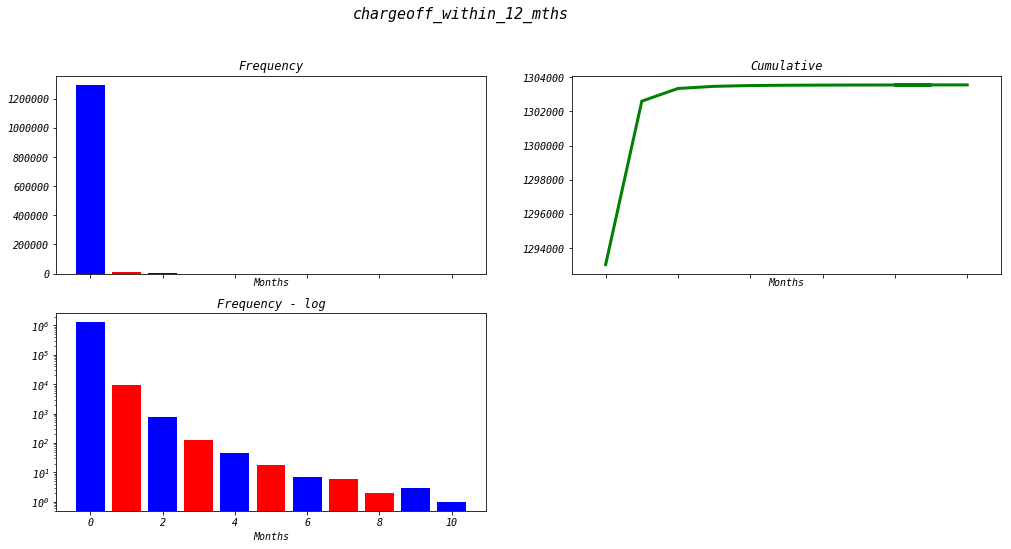

In [100]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,8), sharex=True)

plt.subplots_adjust(right=1, wspace=None, hspace=None)
plt.suptitle("chargeoff_within_12_mths", horizontalalignment="center", fontsize=15,
             x=0.5, y=1)

ax1.bar(x=charge_4_1.iloc[:,0], height=charge_4_1.iloc[:,1], color=['b', 'r'])
ax1.set_title('Frequency')
ax1.set_xlabel("Months")

ax2.plot(charge_4_1.iloc[:,0], charge_cumsum, linewidth=3, color='green' )
ax2.set_title('Cumulative')
ax2.set_xlabel("Months")

ax3.bar(x=charge_4_1.iloc[:,0], height=charge_4_1.iloc[:,1], 
        color=['b', 'r'])
ax3.set_title('Frequency - log')
ax3.set_xlabel("Months")
ax3.set_yscale('log')

ax4.axis('off')

plt.show()

Assuming "chargeoff_within_12_mths" refers to past behavior this variable is kept,
while ca. 99 percent had no charge off at all.

Store the manipulated data set in a csv file.

In [101]:
loans_4.to_csv("loans_j1_cleaned.csv",index=False)

### Missing values / Null values

<p>
Columns (features) with more than 50 percent of missing values
were allready deleted. However the data sets contains still
missing values in the rows (observations). As most of the machine
learning algorithms in sklearn does not process null values, these values
are now removed.
</p> 

In [102]:
loans_4.shape

(1303607, 66)

In [103]:
loans_4_null = \
loans_4.isnull().sum().reset_index(). \
rename(columns= {'index': 'feature', 0:'frequency'}).\
sort_values('frequency', ascending=False)

In [104]:
loans_4_not_null=loans_4_null[loans_4_null.frequency!=0]
print(loans_4_not_null.shape)
print(loans_4_not_null.head())

(41, 2)
                  feature  frequency
39  mths_since_recent_inq  169549   
50  num_tl_120dpd_2m       115570   
35  mo_sin_old_il_acct     104295   
54  pct_tl_nvr_dlq         67681    
30  avg_cur_bal            67548    


In [105]:
loans_4_not_null_cols = \
loans_4_not_null.feature.to_list()

In [106]:
loans_4_not_null_cols = loans_4_not_null.feature.to_list()

# features with 0 values in percent of all observations
not_null_percent = \
(loans_4_not_null.frequency / loans_4.shape[0]).reset_index(drop=True)

print(type(not_null_percent))
print(type(loans_4_not_null.feature))

print(len(loans_4_not_null.feature))
print(len(not_null_percent))

notnull_1 = \
pd.concat([loans_4_not_null.feature.reset_index(drop=True), 
           not_null_percent.reset_index(drop=True)], axis=1)

print(notnull_1.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
41
41
                 feature  frequency
0  mths_since_recent_inq  0.130061 
1  num_tl_120dpd_2m       0.088654 
2  mo_sin_old_il_acct     0.080005 
3  pct_tl_nvr_dlq         0.051918 
4  avg_cur_bal            0.051816 


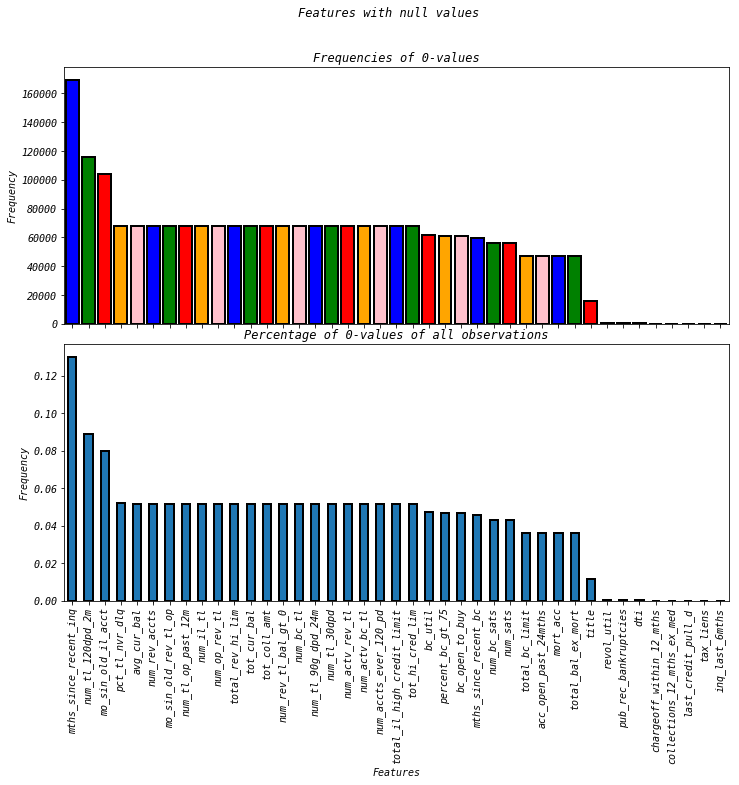

In [107]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

plt.suptitle('Features with null values', y=1.08)
plt.tight_layout()

# pyplot
ax1.bar(height=loans_4_not_null.frequency, x=loans_4_not_null.feature,
      color=['blue', 'green', 'red', 'orange', 'pink'],
      edgecolor="black", linewidth=2)
ax1.set_xticklabels(loans_4_not_null.feature, rotation=90)
ax1.set_title('Frequencies of 0-values')
ax1.set_xlabel('Features')
ax1.set_ylabel('Frequency')

# pandas plot - the ax argument is helpful
notnull_1.plot(kind='bar', ax=ax2, 
               x= 'feature',
               y= 'frequency',
               edgecolor="black", linewidth=2,
               legend=False,
               title="Percentage of 0-values of all observations")
ax2.set_xlabel('Features')
ax2.set_ylabel('Frequency')


plt.show()

Most null values are in mths_since_recent. None of the variables have
a frequency of null-values greater than 1 percent.

#### Strategies for handling missing values

In [108]:
loans_5 = loans_4.copy()

In [109]:
print(loans_5['mths_since_recent_inq'].dtype)
unique_22 = loans_5['mths_since_recent_inq'].\
unique()
unique_22_sorted = sorted(unique_22)
print(unique_22_sorted)
print(np.nanmedian(unique_22))


float64
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 17.0, nan, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]
12.5


In [110]:
print(loans_5['mths_since_recent_inq'].value_counts(dropna=False)[:10])

NaN     169549
1.0     131388
0.0     104688
2.0     104388
3.0     94007 
4.0     84443 
5.0     74711 
6.0     66415 
7.0     63057 
8.0     55275 
9.0     48142 
10.0    42032 
Name: mths_since_recent_inq, dtype: int64


In [111]:
print(loans_5['mths_since_recent_inq'].isnull().sum())

169549


In [112]:
# Determine index of null values
index_01 = \
loans_5['mths_since_recent_inq'].index \
[loans_5['mths_since_recent_inq'].apply(np.isnan)].tolist()
print(len(index_01))
print(index_01[:10])
print(loans_5['mths_since_recent_inq'].shape[0])

169549
[6, 27, 37, 60, 80, 99, 104, 135, 150, 183]
1303607


Given the explanation of the variable and the sequence of
unique values it seems plausible that the data points
are "missing completely at random". As it is a
continuous numerical variable the values are here
imputed with the median.

In [113]:
median_impute_1 = \
loans_5['mths_since_recent_inq'].\
fillna(loans_5['mths_since_recent_inq'].median())
print(type(median_impute_1))
print(median_impute_1.isnull().sum())

<class 'pandas.core.series.Series'>
0


In [114]:
loans_5.mths_since_recent_inq = median_impute_1 

#### Other columns with null values

In [115]:
loans_4[loans_4_not_null_cols].dtypes[:10]

mths_since_recent_inq    float64
num_tl_120dpd_2m         float64
mo_sin_old_il_acct       float64
pct_tl_nvr_dlq           float64
avg_cur_bal              float64
num_rev_accts            float64
mo_sin_old_rev_tl_op     float64
num_tl_op_past_12m       float64
num_il_tl                float64
num_op_rev_tl            float64
dtype: object

In [116]:
loans_4[loans_4_not_null_cols].isnull().sum()[:10]

mths_since_recent_inq    169549
num_tl_120dpd_2m         115570
mo_sin_old_il_acct       104295
pct_tl_nvr_dlq           67681 
avg_cur_bal              67548 
num_rev_accts            67528 
mo_sin_old_rev_tl_op     67528 
num_tl_op_past_12m       67527 
num_il_tl                67527 
num_op_rev_tl            67527 
dtype: int64

In [117]:
loans_6 = loans_5.copy() 

Replace the null values with randomly generated values selected from
unique values of the series.

In [118]:
unique_777 = loans_6.num_tl_120dpd_2m.dropna().unique().tolist()
unique_777 

[0.0, 1.0, 4.0, 2.0, 3.0, 6.0]

In [119]:
loans_6.num_tl_120dpd_2m.value_counts(dropna=False)

0.0    1187105
NaN    115570 
1.0    893    
2.0    33     
3.0    4      
6.0    1      
4.0    1      
Name: num_tl_120dpd_2m, dtype: int64

Get the index.

In [120]:
index_02 = \
loans_6.num_tl_120dpd_2m.index[loans_6.num_tl_120dpd_2m.apply(np.isnan)].tolist()
print(len(index_02))

115570


In [121]:
np.asarray(unique_777)

array([0., 1., 4., 2., 3., 6.])

In [122]:
np.random.choice(np.asarray(unique_777), 1)

array([3.])

In [123]:
# numpy.random.choice(a, size=None, replace=True, p=None)
# creating a list of randomly selected values

substitute_1 = []
for i in range(0, len(index_02)):
    sub = np.random.choice(unique_777, 1)
    sub_2 = sub.tolist()
    substitute_1.append(sub_2)
    

In [124]:
# flatten the list of lists
substitute_2 = np.concatenate(substitute_1).ravel().tolist()

In [125]:
print(len(substitute_2))
print(substitute_2[10000:10005])
print(type(substitute_2[10000]))

115570
[6.0, 1.0, 4.0, 1.0, 1.0]
<class 'float'>


In [126]:
nan_23 = loans_6.loc[index_02, 'num_tl_120dpd_2m']
print(type(nan_23))
print([nan_23.iloc[i] for i in [900, 4300, 80000, 91000]])
print(nan_23.unique())

<class 'pandas.core.series.Series'>
[nan, nan, nan, nan]
[nan]


In [127]:
# substitute null values with random values placed by the index
loans_6.loc[index_02, 'num_tl_120dpd_2m'] = substitute_2

In [128]:
print(len(loans_6.loc[index_02, 'num_tl_120dpd_2m']))
print(loans_6.loc[:, 'num_tl_120dpd_2m'].isnull().sum())

115570
0


In [129]:
loans_6.num_tl_120dpd_2m.value_counts(dropna=False)

0.0    1206504
1.0    20128  
2.0    19540  
4.0    19205  
6.0    19133  
3.0    19097  
Name: num_tl_120dpd_2m, dtype: int64

The replacement of null values with random values was successful for this
varible. However there are numerous columns of type float with null values.
This step by step approach would be to cumbersome. Instead a boolean 
mask can help to distinguish between null and non-null values.


In [130]:
only_floats_1=loans_6[loans_4_not_null_cols].select_dtypes(include='float').dtypes
only_floats_1[:5]

mths_since_recent_inq    float64
num_tl_120dpd_2m         float64
mo_sin_old_il_acct       float64
pct_tl_nvr_dlq           float64
avg_cur_bal              float64
dtype: object

In [131]:
feature_66 = loans_6.mo_sin_old_il_acct
unique_66 = feature_66.unique().tolist()
print(type(feature_66))
print(type(unique_66))
print(len(feature_66))
print(feature_66.isnull().sum())
print(len(feature_66.unique()))


<class 'pandas.core.series.Series'>
<class 'list'>
1303607
104295
521


Understanding the boolean mask to distinguish between null and non-null
values.

In [132]:
feature_77 = feature_66.copy()
mask_77 = feature_77.isnull()

print("Number of all observations: ", len(feature_77))
print("Number of true or false values in mask: ", len(mask_77))
print("Number of null values: ", mask_77.sum())

Number of all observations:  1303607
Number of true or false values in mask:  1303607
Number of null values:  104295


In [133]:
# invert with tilde gives the non null values,
# where isnull is False
# https://stackoverflow.com/questions/8305199/the-tilde-operator-in-python

non_null_1 = feature_77[~mask_77].values
print(non_null_1[:10])
print("Number of non null values: ", len(non_null_1))
print("Type of object: ", type(non_null_1))
# np.isnan can be applied to NumPy arrays of native dtype (such as np.float64):
# but raises TypeError when applied to object arrays.
# https://stackoverflow.com/questions/36000993/numpy-isnan-fails-on-an-array-of-floats-from-pandas-dataframe-apply
print("Null values in non null: ", pd.isnull(non_null_1).sum())

null_values_1 = feature_77[mask_77].values
print(null_values_1[:10])
print("Number of null values: ", len(null_values_1))
print("Type of object", type(null_values_1))
print("Null values in null values: ", pd.isnull(null_values_1).sum())

[ 83. 114. 171. 180. 254.  78. 116. 177.  57. 130.]
Number of non null values:  1199312
Type of object:  <class 'numpy.ndarray'>
Null values in non null:  0
[nan nan nan nan nan nan nan nan nan nan]
Number of null values:  104295
Type of object <class 'numpy.ndarray'>
Null values in null values:  104295


The boolean mask works and can give null and non-null values.

#### Replacing null values in a pandas series by selecting random item from a list of unique values.

<p> 
The essential function here is random choices:
</p>
<p> 
random.choices(population, weights=None, *, cum_weights=None, k=1)
Return a k sized list of elements chosen from the population with replacement. 
If the population is empty, raises IndexError.
</p> 

<a href="https://docs.python.org/3/library/random.html">Doc</a> 

In [134]:
def null_replace_random(series):
    s = series.copy()
    
    # Creating a boolean mask, which checks if the value
    # is null or not and returns True and False
    # same as: feature_66.isnull()
    
    mask = s.isnull()
    
    # s[~mask] gives the non-null-values
    # s[~mask].values returns a numpy representation of the series
    # mask.sum() is equivalent to feature_66.isnull().sum()
    # and give the number of null values, which is here 104295
    # random.choices(population, weights=None, *, cum_weights=None, k=1)
    # Return a k sized list of elements chosen from the population with replacement.
    # population: s[~mask].values: here: 1199312 / k = 104295
    
    selection = choices( s[~mask].values , k = mask.sum() )
    
    # now the randomly generated selections from the population
    # are replacing the null values, where mask = True
    s[mask] = selection
    
    # returns a series, where every null value is replaced with a randomly choosen
    # value from the unique values of the population
    
    return s

In [135]:
null_replaced_1 = null_replace_random(feature_66)
print(null_replaced_1.isnull().sum())

0


In [136]:
loans_7 = loans_6.copy()
# replacing the column loans_6.mo_sin_old_il_acct with null_replaced_1

print(len(null_replaced_1))
print(len(loans_6.mo_sin_old_il_acct))
# works because the number of observations is the same

loans_6.mo_sin_old_il_acct = null_replaced_1
print(loans_6.mo_sin_old_il_acct.isnull().sum())

1303607
1303607
0


This has worked out. There are no null values in the column.
Boolean masks are a valuable tool. The next step is now
to adapt the function to replacing null values in columns of
a data frame by looping over the columns.

In [137]:
def null_replace_random_df(dataframe):
    df = dataframe.copy()
    
    # do like above for every column using a for loop
    # how does this turn out for non-numeric columns
    for col in df.columns.tolist():
        mask = df[col].isnull()
        # set copy, otherwise warning
        feature = df[col]
        selection = choices( feature[~mask].values , k = mask.sum() )
        feature[mask] = selection
    
    # returns a data frame, where every null value is replaced with a randomly choosen
    # value from the unique values of the population
    
    return df

In [138]:
loans_8 = loans_6.copy()

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    null_replaced_df_1 = null_replace_random_df(loans_8)
    fxn()


    

In [139]:
null_replaced_df_1.isnull().sum()[:5]

loan_amnt      0
term           0
installment    0
grade          0
emp_length     0
dtype: int64

Was the replacement of null values with random values successful?

In [140]:
s_555 = loans_5.isnull().sum().reset_index().rename(columns={0:'null_value'})
s_666 = null_replaced_df_1.isnull().sum().reset_index().rename(columns={0:'null_value'})
s_merged_1 = s_555.merge(s_666, how="left", on='index')


In [141]:
s_merged_1.head()

,index,null_value_x,null_value_y
0,loan_amnt,0,0
1,term,0,0
2,installment,0,0
3,grade,0,0
4,emp_length,0,0


In [142]:
mask_2 = s_merged_1.null_value_x == s_merged_1.null_value_y
replace_success = s_merged_1[~mask_2]
print(replace_success.shape)
print(replace_success.head())
print(replace_success.tail())
print(replace_success[replace_success.null_value_y!=0])

(40, 3)
                 index  null_value_x  null_value_y
10  title               15426         0           
12  dti                 312           0           
15  inq_last_6mths      1             0           
19  revol_util          810           0           
22  last_credit_pull_d  54            0           
                         index  null_value_x  null_value_y
57  tax_liens                   39            0           
58  tot_hi_cred_lim             67527         0           
59  total_bal_ex_mort           47281         0           
60  total_bc_limit              47281         0           
61  total_il_high_credit_limit  67527         0           
Empty DataFrame
Columns: [index, null_value_x, null_value_y]
Index: []


The replacement was successful.

In [143]:
loans_9 = null_replaced_df_1

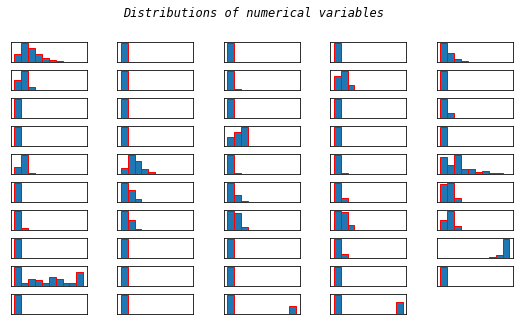

In [144]:
# quick overview of the numerical variables of type float
l9_num_1 = loans_9.select_dtypes(include=['float'])


fig = plt.figure(figsize=(9,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle("Distributions of numerical variables")

for i,d in zip(range(1, 50), range(0,49)):
    plt.subplot(10, 5, i)
    plt.hist(l9_num_1.iloc[:,d], edgecolor="red")
    plt.xticks([], [])
    plt.yticks([], [])


#### Categorical or other none-numerical variables.

In [145]:
# loans_9.select_dtypes(include="object")
print("Number of data types:\n{}".format(loans_9.dtypes.value_counts()))

Number of data types:
float64    49
object     13
int64      3 
int32      1 
dtype: int64


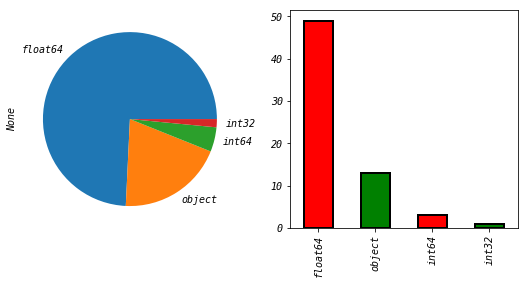

In [146]:
fig, (ax1, ax2) = plt.subplots(1,2)
loans_9.dtypes.value_counts().plot(kind="pie", ax=ax1, figsize=(10, 5))
loans_9.dtypes.value_counts().plot(kind="bar", ax=ax2, figsize=(9, 4), 
                                   edgecolor="black", linewidth=2, color=['r', 'g'])
plt.show()

In [147]:
l9_objects = loans_9.select_dtypes(include=['object'])
print(l9_objects.shape)
# loans_9.columns.tolist()

(1303607, 13)


In [148]:
l9_objects.columns.tolist()

['term',
 'grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [149]:
for i in l9_objects:
    print(i, ':', type(l9_objects.loc[1,i]))

term : <class 'str'>
grade : <class 'str'>
home_ownership : <class 'str'>
issue_d : <class 'str'>
purpose : <class 'str'>
title : <class 'str'>
addr_state : <class 'str'>
earliest_cr_line : <class 'str'>
initial_list_status : <class 'str'>
last_credit_pull_d : <class 'str'>
application_type : <class 'str'>
disbursement_method : <class 'str'>
debt_settlement_flag : <class 'str'>


In [150]:
for i in l9_objects:
    print(i, ':', l9_objects[i].unique()[:3])

term : [' 36 months' ' 60 months']
grade : ['D' 'C' 'A']
home_ownership : ['MORTGAGE' 'RENT' 'OWN']
issue_d : ['Dec-2018' 'Nov-2018' 'Oct-2018']
purpose : ['debt_consolidation' 'credit_card' 'other']
title : ['Debt consolidation' 'Credit card refinancing' 'Other']
addr_state : ['CA' 'OH' 'WA']
earliest_cr_line : ['Jan-2012' 'Jun-2009' 'Feb-1999']
initial_list_status : ['w' 'f']
last_credit_pull_d : ['Jan-2019' 'Feb-2019' 'Dec-2018']
application_type : ['Joint App' 'Individual']
disbursement_method : ['Cash' 'DirectPay']
debt_settlement_flag : ['N' 'Y']


In [151]:
for i in l9_objects:
    print(i, ":" , len(l9_objects[i].unique()))

term : 2
grade : 7
home_ownership : 6
issue_d : 139
purpose : 14
title : 61678
addr_state : 51
earliest_cr_line : 738
initial_list_status : 2
last_credit_pull_d : 139
application_type : 2
disbursement_method : 2
debt_settlement_flag : 2


Some features are of type categorical and some look like type datetime-objects, while
the data encoding might not be of this type.

#### How to deal with date time features?

In [152]:
loans_dtypes_explained[(loans_dtypes_explained.variable=='earliest_cr_line') |
                       (loans_dtypes_explained.variable=='last_credit_pull_d')  |
                       (loans_dtypes_explained.variable=='issue_d')]


,variable,dtypes,first value,explanation
15,issue_d,object,Dec-2018,The month which the loan was funded
26,earliest_cr_line,object,Apr-2001,The month the borrower's earliest reported credit line was opened
48,last_credit_pull_d,object,Feb-2019,The most recent month LC pulled credit for this loan


In [153]:
# What is the current format of the object?

print(loans_9.loc[5:9,'earliest_cr_line'])
# looks like date
print(loans_9['earliest_cr_line'].dtype)
print(type(loans_9.loc[3,'earliest_cr_line']))
# coded as string
print(len(loans_9['earliest_cr_line'].unique()))
# 738 unique dates

5    Apr-1995
6    Apr-2009
7    Mar-2004
8    Jun-2007
9    Oct-2002
Name: earliest_cr_line, dtype: object
object
<class 'str'>
738


Machine learning algorithms can (in general) only process numeric values.
Neither datetime nor string formats suffice this criteria, but datetime objects
in Python 
(<a href="https://www.w3schools.com">doc</a>) 
and Pandas offer suffcient functionality to "wrangle" with datetime
in a lot of ways. 

In [154]:
# Converting from string format to datetime format using pandas.to_datetime
early_1 = pd.to_datetime(arg=loans_9.earliest_cr_line, format='%b-%Y')

print(type(early_1))
print(early_1.dtype)
print(early_1.iloc[1])
print(type(print(early_1.iloc[1])))


<class 'pandas.core.series.Series'>
datetime64[ns]
2009-06-01 00:00:00
2009-06-01 00:00:00
<class 'NoneType'>


In [155]:
month_1 = early_1.dt.month
print(month_1.iloc[:5] )
print(month_1.dtype)

year_1 = early_1.dt.year
print(year_1.iloc[:5])
print(year_1.dtype)

0    1 
1    6 
2    2 
3    12
4    10
Name: earliest_cr_line, dtype: int64
int64
0    2012
1    2009
2    1999
3    2003
4    1997
Name: earliest_cr_line, dtype: int64
int64


There are many possibilities to reassign the datetime.
A short overview is given on
<a href="https://brohrer.github.io/datetime_tricks.html">How to use datetime</a>.
Especially important is the timedelta option. Here the 'earliest_cr_line' feature
was converted into a datetime-object and is now reassigned as numeric columns.

In [156]:
loans_10 = loans_9.copy()
loans_10['early_month'] = month_1
loans_10['early_year'] = year_1
# The column earliest_cr_line is not longer needed
loans_10 = loans_10.drop('earliest_cr_line', axis=1)
print(sorted(loans_10.columns.tolist())[:25])

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'early_month', 'early_year', 'emp_length', 'grade', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'issue_d', 'last_credit_pull_d']


In [157]:
"".join(['early_month', 'early_year']) in "".join(loans_10.columns)

True

The other datetime columns coded as strings.

In [158]:
print(loans_10.loc[:5, 'issue_d'])
print(loans_10.loc[:5, 'last_credit_pull_d'])

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
Name: issue_d, dtype: object
0    Jan-2019
1    Feb-2019
2    Feb-2019
3    Feb-2019
4    Feb-2019
5    Jan-2019
Name: last_credit_pull_d, dtype: object


In [159]:
loans_11 = loans_10.copy()

In [160]:
# this functions convert the string column into a datetime object
# then extracts month and years and insert those as columns into the data frame
# it then drops the initial feature column and returns the data frame 

def extract_datetime(df, feature, format_code):
    
    date_obj = pd.to_datetime(arg=df[feature], format=format_code)
    df[feature + "_" + 'month'] = date_obj.dt.month
    df[feature + "_" + 'year'] = date_obj.dt.year
    
    df = df.drop(feature, axis=1)
    
    return df

In [161]:
loans_12 = \
extract_datetime(df=loans_11, feature='issue_d', format_code='%b-%Y')


In [162]:
print(loans_12.shape)
print(loans_12.iloc[:2,:6])
print(loans_12.loc[:2, ['issue_d_month', 'issue_d_year']])

(1303607, 68)
   loan_amnt        term  installment grade  emp_length home_ownership
0  30000       36 months  1151.16      D     5           MORTGAGE     
1  40000       60 months  975.71       C     1           MORTGAGE     
   issue_d_month  issue_d_year
0  12             2018        
1  12             2018        
2  12             2018        


In [163]:
loans_13 = \
extract_datetime(df=loans_12, feature='last_credit_pull_d', format_code='%b-%Y')

In [164]:
print(loans_13.shape)
# two new columns are added
print(loans_13.iloc[:2,:6])
print(loans_13.loc[:2, ['last_credit_pull_d_month', 'last_credit_pull_d_year']])

(1303607, 69)
   loan_amnt        term  installment grade  emp_length home_ownership
0  30000       36 months  1151.16      D     5           MORTGAGE     
1  40000       60 months  975.71       C     1           MORTGAGE     
   last_credit_pull_d_month  last_credit_pull_d_year
0  1                         2019                   
1  2                         2019                   
2  2                         2019                   


In [165]:
l13_objects = loans_13.select_dtypes(include=['object'])
print(l13_objects.shape)
print(l13_objects.info() )

(1303607, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303607 entries, 0 to 1303606
Data columns (total 10 columns):
term                    1303607 non-null object
grade                   1303607 non-null object
home_ownership          1303607 non-null object
purpose                 1303607 non-null object
title                   1303607 non-null object
addr_state              1303607 non-null object
initial_list_status     1303607 non-null object
application_type        1303607 non-null object
disbursement_method     1303607 non-null object
debt_settlement_flag    1303607 non-null object
dtypes: object(10)
memory usage: 99.5+ MB
None


The datetime columns like last_credit_pull_d are gone.

In [166]:
for i in l13_objects:
    print(i, ':', l13_objects[i].unique()[:15])

term : [' 36 months' ' 60 months']
grade : ['D' 'C' 'A' 'B' 'E' 'G' 'F']
home_ownership : ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
purpose : ['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'vacation' 'medical'
 'major_purchase' 'renewable_energy' 'wedding' 'educational']
title : ['Debt consolidation' 'Credit card refinancing' 'Other' 'Home buying'
 'Car financing' 'Home improvement' 'Moving and relocation' 'Business'
 'Vacation' 'Medical expenses' 'Major purchase' 'Green loan'
 'Debt Consolidation' 'Barclaycard, Discover and Springleaf '
 'House Renovation-2011']
addr_state : ['CA' 'OH' 'WA' 'TX' 'MA' 'PA' 'MI' 'ID' 'AZ' 'NY' 'LA' 'RI' 'IL' 'TN'
 'NV']
initial_list_status : ['w' 'f']
application_type : ['Joint App' 'Individual']
disbursement_method : ['Cash' 'DirectPay']
debt_settlement_flag : ['N' 'Y']


In [167]:
for i in l13_objects:
    print(i, ':', len(l13_objects[i].unique()))

term : 2
grade : 7
home_ownership : 6
purpose : 14
title : 61678
addr_state : 51
initial_list_status : 2
application_type : 2
disbursement_method : 2
debt_settlement_flag : 2


#### adress_state

<p>
The remaining columns are all of categorical type. 
However the feature address_state has 51 columns. 
This is a problem as 51 -1 columns would be necessary to do one-hot-encoding or 
create dummy variables. This is possible but prone to distortions and increases
the need for computing power. It is tempting to drop the feature, but
geographic data is in general a good predictor for binary target variables like
default or not on a credit.
</p> 
<p>
Before getting on it is necessary to take a closer look at the address_state data.
</p>


In [168]:
# value counts of address_state gives the frequencies of every state in the column
adress_1 = loans_13.addr_state.value_counts().sort_values(ascending=False)
adress_1 = \
adress_1.reset_index().rename(columns={'index':'state', 'addr_state':'frequency'})

adress_1['percentile_rank']= adress_1['frequency'].rank()


print(adress_1.head(10))
print(type(adress_1))
# California, Texas and New York are above 100.000 borrowings. The other
# states are below. Florida is with 92619 closer to the first three than the
# next state Illinois.

  state  frequency  percentile_rank
0  CA    191032     51.0           
1  TX    106673     50.0           
2  NY    106384     49.0           
3  FL    92619      48.0           
4  IL    50027      47.0           
5  NJ    46884      46.0           
6  PA    44117      45.0           
7  OH    42436      44.0           
8  GA    42031      43.0           
9  VA    36852      42.0           
<class 'pandas.core.frame.DataFrame'>


In [169]:
top_4_quantile = 1 - adress_1.loc[4, 'percentile_rank']
top_4_quantile
# The top 4 percentile with the highest values is 
# only made of 0.078 percent of the data

-46.0

496708
806899


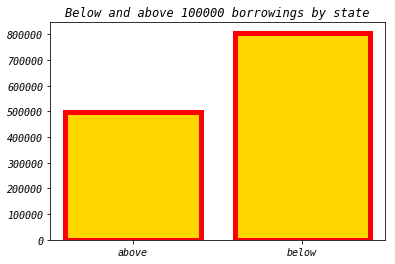

In [170]:
above_90 = adress_1.loc[adress_1.frequency >= 90000, 'frequency'].sum()
below_90 = adress_1.loc[adress_1.frequency < 90000, 'frequency'].sum()
print(above_90)
print(below_90)

seperation = pd.Series([above_90, below_90])

fig, ax = plt.subplots(1)
ax.bar(x=['above', 'below'], height=seperation, edgecolor="red", linewidth=5,
       color="gold")
ax.set_title("Below and above 100000 borrowings by state")
plt.show()

One options is to decrease the number of levels of the categorical variable
adress state by using only a subset like above 100.000. 
As the amount of states with borrowers below 100.000 is substantial,
this is not a good option.

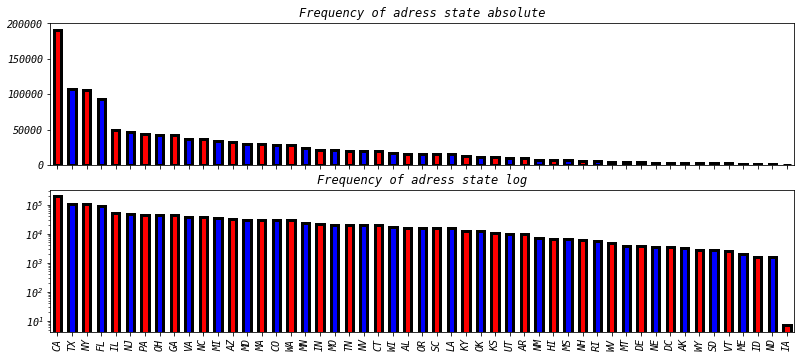

In [171]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
plt.tight_layout(pad=1)

loans_13.addr_state.value_counts().plot(kind="bar", ax=ax1, figsize=(12,5),
                                        title="Frequency of adress state absolute",
                                        edgecolor="black", linewidth=3, 
                                        color=['r', 'b'])

loans_13.addr_state.value_counts().plot(kind="bar", ax=ax2, figsize=(12,5), 
                                        title="Frequency of adress state log",
                                        edgecolor="black", linewidth=3, 
                                        color=['r', 'b'])
ax2.set_yscale('log')

plt.show()

<p>
The "distribution" is sharply right skewed. Pure label encoding is problematic as there is not a ordinal relationship between the states. California is not more important than New Jersey. However the frequency distribution offers a solution:
</p> 
<p>
Frequency encoding: It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.
</p> 

<a href="https://www.datacamp.com/community/tutorials/encoding-methodologies">Datacamp</a>

<p>
Obviously the frequency is related with the target variable here.
</p> 

In [172]:
# Instead of immediate frequencies proportions are used to avoid 
# overweighting of the feature
adress_3 = adress_1.copy()
adress_3['proportions']=round(adress_1['frequency']/sum(adress_1['frequency']),4)

In [173]:
print(type(adress_3))
adress_3.head(6)

<class 'pandas.core.frame.DataFrame'>


,state,frequency,percentile_rank,proportions
0,CA,191032,51.0,0.1465
1,TX,106673,50.0,0.0818
2,NY,106384,49.0,0.0816
3,FL,92619,48.0,0.0710
4,IL,50027,47.0,0.0384
5,NJ,46884,46.0,0.0360


In [174]:
loans_14=loans_13.copy()

The string levels in the adress state column are replaced with
the proportions using a mapper.

In [175]:
# Create dictionary from a df
# This dictionary is used as a mapper
dict_adress=pd.DataFrame(adress_3.proportions.values, index=adress_3.state).to_dict()
dict_adress=dict_adress[0]
dict_df = pd.DataFrame.from_dict(dict_adress,  orient='index').head(5)
dict_df

,0
CA,0.1465
TX,0.0818
NY,0.0816
FL,0.0710
IL,0.0384


In [176]:
mapper_1 =loans_14['addr_state'].map(dict_adress)

In [177]:
print(type(mapper_1))
print(mapper_1.iloc[:5])

<class 'pandas.core.series.Series'>
0    0.1465
1    0.0326
2    0.0218
3    0.0818
4    0.0230
Name: addr_state, dtype: float64


In [178]:
loans_14['addr_state'] = mapper_1

In [179]:
print(loans_14['addr_state'].head())
print(loans_14['addr_state'].dtype)
print(sorted(loans_14.columns.tolist()[:10]))

0    0.1465
1    0.0326
2    0.0218
3    0.0818
4    0.0230
Name: addr_state, dtype: float64
float64
['annual_inc', 'emp_length', 'grade', 'home_ownership', 'installment', 'loan_amnt', 'loan_status', 'purpose', 'term', 'title']


The replacement was successful.

#### purpose and title

In [180]:
loans_dtypes_explained[(loans_dtypes_explained.variable=='purpose') |
                       (loans_dtypes_explained.variable=='title')]


,variable,dtypes,first value,explanation
20,purpose,object,debt_consolidation,A category provided by the borrower for the loan request.
21,title,object,Debt consolidation,The loan title provided by the borrower


In [181]:
for i in ['purpose', 'title']:
    print(i, ": ", loans_14.loc[:, i].unique())
    print(i, ": ", len(loans_14.loc[:, i].unique()))

purpose :  ['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'vacation' 'medical'
 'major_purchase' 'renewable_energy' 'wedding' 'educational']
purpose :  14
title :  ['Debt consolidation' 'Credit card refinancing' 'Other' ...
 'Retiring credit card debt' 'MBA Loan Consolidation' 'JAL Loan']
title :  61678


The purpose and title column are similar. Multicollinearity is given. The titles given 
by the borrowers are more diverse and confusing. For this reason this one is
dropped.

In [182]:
loans_14 = loans_14.drop('title', axis=1)

#### Final encoding of the categorical variables

Some variables were allready encoded in context of the feature selection 
and other operations above. Now the final encoding of the remaining
categorical variables are conducted.

In [183]:
l14_objects = loans_14.select_dtypes(include=['object'])
print(l14_objects.shape)
print(l14_objects.info())

(1303607, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303607 entries, 0 to 1303606
Data columns (total 8 columns):
term                    1303607 non-null object
grade                   1303607 non-null object
home_ownership          1303607 non-null object
purpose                 1303607 non-null object
initial_list_status     1303607 non-null object
application_type        1303607 non-null object
disbursement_method     1303607 non-null object
debt_settlement_flag    1303607 non-null object
dtypes: object(8)
memory usage: 79.6+ MB
None


In [184]:
for i in l14_objects:
    print(i, ':', l14_objects[i].unique()[:15])

term : [' 36 months' ' 60 months']
grade : ['D' 'C' 'A' 'B' 'E' 'G' 'F']
home_ownership : ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
purpose : ['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'vacation' 'medical'
 'major_purchase' 'renewable_energy' 'wedding' 'educational']
initial_list_status : ['w' 'f']
application_type : ['Joint App' 'Individual']
disbursement_method : ['Cash' 'DirectPay']
debt_settlement_flag : ['N' 'Y']


<p>Ordinal or nominal level of measurement?</p> 
<p>
In case of an ordinal level the label communicate a rank. In
case of a nominal level the opposite is true and the levels 
are only descriptive. Ordinal variables can encoded with labels in one
column as done for example with the address_state feature.
Nominal variables would send to much information to the algorithm with
label encoding. In this case dummy variables are created, where each
columns code an attribute as 0 or 1.
</p> 

#### term

In [185]:
# The assumption here is that it makes a difference for the target
# variable if the term is 36 or 60 months.
# 60 months may have lower default rate
# There might be a correlation with interest rate, which is not
# followed up here.

term_1 = loans_14['term']
term_1 = \
term_1.str.replace('months', '').str.strip()

term_2 = term_1.apply(int)

print(term_2.value_counts())
print(type(term_2))
print(len(term_2))
print(term_2.iloc[:3])

36    988754
60    314853
Name: term, dtype: int64
<class 'pandas.core.series.Series'>
1303607
0    36
1    60
2    36
Name: term, dtype: int64


In [186]:
loans_14['term'] = term_2
print(loans_14['term'].dtype)

int64


In [187]:
loans_dtypes_explained[(loans_dtypes_explained.variable=='grade')|
                       (loans_dtypes_explained.variable=='home_ownership')]

,variable,dtypes,first value,explanation
8,grade,object,C,LC assigned loan grade
12,home_ownership,object,RENT,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


Grade is obviously a ordinal variable with an inherent ranking.
Home ownership is more tricky. Own is better than rent and rent better
than mortage as additional debt all things equal. This assumption is taken here. Problem, a research did not reveal the meaning of any or none.


In [188]:
loans_14['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [189]:
loans_14['home_ownership'].value_counts()

MORTGAGE    645496
RENT        517808
OWN         139844
ANY         267   
OTHER       144   
NONE        48    
Name: home_ownership, dtype: int64

In [190]:
mapping_2 = {
"grade":{ 'A':7,'B':6, 'C':5, 'D':4, 'E':3 ,'F':2, 'G':1 },
"home_ownership":{'OWN':6, 'RENT':5, 'NONE':4, 'MORTGAGE':3, 'ANY':2, 'OTHER':2}
}
mapping_2

{'grade': {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1},
 'home_ownership': {'OWN': 6,
  'RENT': 5,
  'NONE': 4,
  'MORTGAGE': 3,
  'ANY': 2,
  'OTHER': 2}}

In [191]:
loans_15 = loans_14.copy()
loans_15 = loans_15.replace(mapping_2)
loans_15[['grade', 'home_ownership']].head()

,grade,home_ownership
0,4,3
1,5,3
2,7,3
3,6,5
4,3,3


In [192]:
l15_objects = loans_15.select_dtypes(include=['object'])
for i in l15_objects:
    print(i, ':', l15_objects[i].unique()[:15])

purpose : ['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'vacation' 'medical'
 'major_purchase' 'renewable_energy' 'wedding' 'educational']
initial_list_status : ['w' 'f']
application_type : ['Joint App' 'Individual']
disbursement_method : ['Cash' 'DirectPay']
debt_settlement_flag : ['N' 'Y']


In [193]:
loans_16=loans_15.copy()
final_cat_features = loans_16.select_dtypes(include=['object']).columns.to_list()

In [194]:
dummy_df = pd.get_dummies(loans_16[final_cat_features])
loans_16 = pd.concat([loans_16, dummy_df], axis=1)
loans_16 = loans_16.drop(final_cat_features, axis=1)

In [195]:
loans_16.head(2)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,...,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
0,30000,36,1151.16,4,5,3,100000.0,1,0.1465,30.46,...,0,0,0,1,0,1,1,0,1,0
1,40000,60,975.71,5,1,3,45000.0,1,0.0326,50.53,...,0,0,0,1,0,1,1,0,1,0


In [196]:
loans_16 = loans_16.astype('float64')

In [197]:
print(type(loans_16))

<class 'pandas.core.frame.DataFrame'>


#### Final check: are features of a numerical type?

In [198]:
loans_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303607 entries, 0 to 1303606
Data columns (total 85 columns):
loan_amnt                        1303607 non-null float64
term                             1303607 non-null float64
installment                      1303607 non-null float64
grade                            1303607 non-null float64
emp_length                       1303607 non-null float64
home_ownership                   1303607 non-null float64
annual_inc                       1303607 non-null float64
loan_status                      1303607 non-null float64
addr_state                       1303607 non-null float64
dti                              1303607 non-null float64
delinq_2yrs                      1303607 non-null float64
inq_last_6mths                   1303607 non-null float64
open_acc                         1303607 non-null float64
pub_rec                          1303607 non-null float64
revol_bal                        1303607 non-null float64
revol_util       

Yes!

### Multicollinearity
<p>
Identifying highly correlated features and delete redundant features
from the data set.
</p>


In [199]:
# calculate correlations
cor = loans_16.corr()
# selecting below main lower triangle of an array to avoid 
# doubles
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
# highly correlated features are here defined as above 0.75 and
# below -0.75
cor_high = cor[(cor > 0.75) | (cor < -0.75)]
print(type(cor_high))

# turn multiindex into data frame
cor_high_df = pd.DataFrame(cor_high)
cor_high_df.reset_index(inplace=True)  


<class 'pandas.core.series.Series'>


In [200]:
print(cor_high_df.shape)
print(cor_high_df.head())

(24, 3)
           level_0         level_1         0
0  installment      loan_amnt       0.953352
1  avg_cur_bal      tot_cur_bal     0.792647
2  bc_util          revol_util      0.806745
3  num_actv_rev_tl  num_actv_bc_tl  0.765595
4  num_bc_sats      num_actv_bc_tl  0.787302


In [201]:
# extract in each case one of the highly correlated features
multicol_features = list(cor_high_df['level_0'])
print(multicol_features)

['installment', 'avg_cur_bal', 'bc_util', 'num_actv_rev_tl', 'num_bc_sats', 'num_op_rev_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_rev_tl_bal_gt_0', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_sats', 'num_tl_30dpd', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit', 'early_year', 'initial_list_status_w', 'application_type_Joint App', 'disbursement_method_DirectPay', 'debt_settlement_flag_Y']


In [202]:
loans_17=loans_16.copy()
print(loans_17.shape)

(1303607, 85)


In [203]:
# drop the redundant features
loans_17 = loans_17.drop(multicol_features, axis=1)
print(loans_17.shape)

(1303607, 66)


In [204]:
loans_17.to_csv("loans_j2_cleaned.csv",index=False)

### Data preprocessing: scaling or not?

<p>
In general machine learning algorithms perfom best when the
independent variables or features are on a similar scale.
An example is the support vector machine algorithm, which
is extraordinary sensitive to data on different scales 
Sklearn offers different methods to set the numerical feature
values on such a scale implementing thereby relatively simple
formulas. 
</p>
<p>
For the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">standard score</a>
the formula is for example:<br> 
x - u / s<br> 
where x is the value, u is the mean and s the standard deviation.
</p> 

<p>The question to be answered is, if the feature numbers are on different scales with large deviations?</p> 



In [205]:
# investigate the target variable modified above
print(loans_17.loan_status.unique())
print(loans_17.loan_status.value_counts())
status_vc_1 = loans_17.loan_status.value_counts()
print(type(status_vc_1))

[1. 0.]
1.0    1041952
0.0    261655 
Name: loan_status, dtype: int64
<class 'pandas.core.series.Series'>


In [206]:
def spread(df):
    spread = df.max() - df.min()
    return spread

In [207]:
spread_1 =  spread(loans_17)   

print(type(spread_1))
print(len(spread_1))
print(spread_1.sort_values()[:5])
print(spread_1.sort_values()[-5:-1])

<class 'pandas.core.series.Series'>
66
addr_state                0.1465
debt_settlement_flag_N    1.0000
ohe_2                     1.0000
ohe_1                     1.0000
purpose_car               1.0000
dtype: float64
total_bal_ex_mort    3408095.0
tot_cur_bal          8000078.0
tot_coll_amt         9152545.0
total_rev_hi_lim     9999999.0
dtype: float64


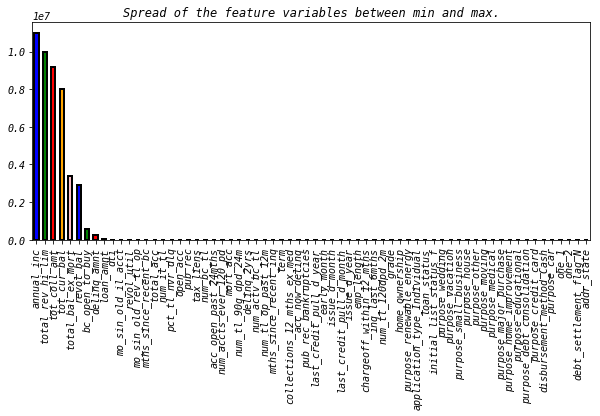

In [208]:
spread_1.sort_values(ascending=False). \
plot(kind='bar', 
     color=['blue', 'green', 'red', 'orange', 'pink'],
     edgecolor="black", linewidth=2, figsize=(10,4),
     title="Spread of the feature variables between min and max.")
plt.show()

There are large differences between some feature variables. 
Therefore scaling is a necessary preprocessing step to make
the ML algos work. The problem then is 

In [209]:
# separate target variable from features
X_1=loans_17.drop('loan_status', axis=1)
print(X_1.shape)
y_1=loans_17.loc[:, 'loan_status']
print(y_1.shape)

(1303607, 65)
(1303607,)


#### Scaling on a simple train-test-split

In [210]:
# doing a simple train-test-split creating a test set of 30 percent
# of the whole data set.

X_1_train, X_1_test, y_1_train, y_1_test = \
train_test_split(X_1, y_1, random_state=42, test_size=0.3)

In [211]:
# doing a standardization
# Standardize features by removing the mean and scaling to unit variance
# by initiating a StandardScaler


X_2_train = X_1_train.copy()
X_2_test = X_1_test.copy()

scaler_1 = StandardScaler()
# The data is fitted to the training data.
scaler_1.fit(X_1_train)

# Creating data frames instead numpy arrays by assigning the
# transformed values back to the data frame
# saving thereby the column names
X_2_train[list(X_1_train.columns)] = scaler_1.fit_transform(X_1_train)
X_2_test[list(X_2_test.columns)] = scaler_1.fit_transform (X_1_test)


In [212]:
print(type(X_2_train))
print(X_2_train.shape)

<class 'pandas.core.frame.DataFrame'>
(912524, 65)


initial_list_status_f         2.023666
purpose_debt_consolidation    2.026725
ohe_2                         2.054255
ohe_1                         2.180995
term                          2.336386
dtype: float64
annual_inc          158.589291
tax_liens           211.008910
total_rev_hi_lim    265.416430
delinq_amnt         302.776164
dtype: float64


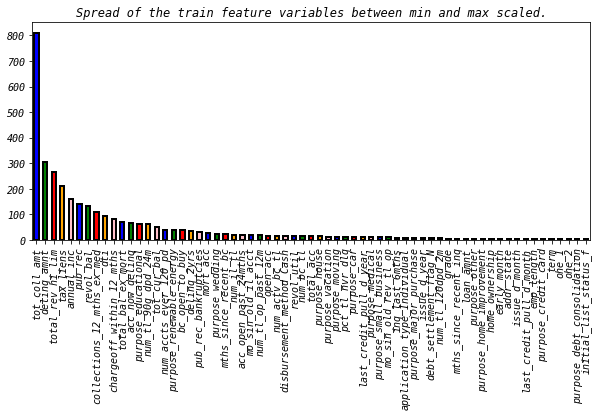

In [213]:
# calculating the ranges of the scaled feature values
spread_2 =  spread(X_2_train)  
print(spread_2.sort_values()[:5])
print(spread_2.sort_values()[-5:-1])

# plot the ranges of feature values
spread_2.sort_values(ascending=False).\
plot(kind='bar', 
     color=['blue', 'green', 'red', 'orange', 'pink'],
     edgecolor="black", linewidth=2, figsize=(10,4),
     title="Spread of the train feature variables between min and max scaled.")
plt.show()

<class 'pandas.core.frame.DataFrame'>
(391083, 65)
initial_list_status_f         2.023695
purpose_debt_consolidation    2.027222
ohe_2                         2.052415
ohe_1                         2.178999
term                          2.336459
dtype: float64
tax_liens           156.775177
acc_now_delinq      177.592953
delinq_amnt         232.023188
total_rev_hi_lim    248.672250
dtype: float64


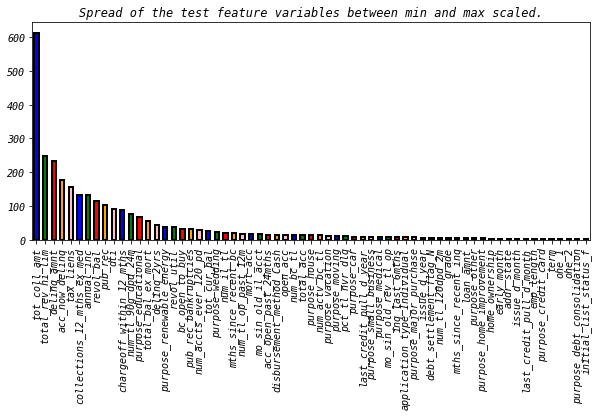

In [214]:
print(type(X_2_test))
print(X_2_test.shape)

spread_3 =  spread(X_2_test)  
print(spread_3.sort_values()[:5])
print(spread_3.sort_values()[-5:-1])

spread_3.sort_values(ascending=False).\
plot(kind='bar', 
     color=['blue', 'green', 'red', 'orange', 'pink'],
     edgecolor="black", linewidth=2, figsize=(10,4),
     title="Spread of the test feature variables between min and max scaled.")
plt.show()

Scaling reduced the range between min and max on each features drastically
and made the range of the data set more similiar, while the differences
are maintained.

#### Model 1: Logistic Regression (aka logit, MaxEnt) classifier.

<p>According to doc:<br>
This class implements regularized logistic regression using the ‘liblinear’ library, 
‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. 
Note that regularization is applied by default. 
</p>



In [215]:
clf_2_log = \
LogisticRegression(solver='lbfgs', 
                   multi_class='multinomial',
                   class_weight='balanced',
                   random_state=42,
                   max_iter=2000)
clf_2_log.fit(X_2_train, y_1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [216]:
predictions_2_log = clf_2_log.predict(X_2_test)

In [217]:
acc_1_log = accuracy_score(y_1_test, predictions_2_log)
print("Accuracy: %s" % (round(acc_1_log,4)))

Accuracy: 0.7227


In [218]:
# some predictions made of a single observation of features
print(clf_2_log.predict(X_2_test.iloc[1,:].values.reshape(1, -1)))
print(clf_2_log.predict(X_2_test.iloc[1000,:].values.reshape(1, -1)))
# the first row leads to a prediction of default
# the 1000th row leads to a prediction of default

[0.]
[0.]


#### Model 2: RandomForestClassifier

<p>According to doc:<br>
A random forest is a meta estimator that fits a number of 
decision tree classifiers on various sub-samples of the dataset 
and uses averaging to improve the 
predictive accuracy and control over-fitting. 
</p>


In [219]:

clf_4_rf = \
RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42,
                       class_weight='balanced')
clf_4_rf.fit(X_2_train, y_1_train) 

print(clf_4_rf.feature_importances_[:10])

predictions_4_rf = clf_4_rf.predict(X_2_test)

acc_2_rf = accuracy_score(y_1_test, predictions_4_rf)
print("Accuracy: %s" % (round(acc_2_rf,4)))


[1.18100659e-02 1.11100330e-01 2.72950277e-01 1.29429526e-03
 6.60534072e-03 5.92842039e-03 5.96343693e-10 2.51705958e-02
 7.39817326e-05 4.92334076e-03]
Accuracy: 0.706


In [220]:
# some predictions made of a single observation of features
print(clf_4_rf.predict(X_2_test.iloc[1,:].values.reshape(1, -1)))
print(clf_4_rf.predict(X_2_test.iloc[1000,:].values.reshape(1, -1)))
# the first row leads to a prediction of not default
# the 1000th row leads to a prediction of not default

[0.]
[1.]


#### Model 3: Multi-layer Perceptron

<p>According to doc:<br>
Multi-layer Perceptron (MLP) is a supervised learning 
algorithm that learns a function by training on a dataset. 
Given a set of features and a target, 
it can learn a non-linear function approximator for 
either classification or regression. 
</p>

In [221]:
clf_5_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf_5_mlp.fit(X_2_train, y_1_train)  
print(clf_5_mlp)

predictions_5_mlp = clf_5_mlp.predict(X_2_test)  

acc_3_mlp = accuracy_score(y_1_test, predictions_5_mlp)
print("Accuracy: %s" % (round(acc_3_mlp,4)))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy: 0.8384


In [222]:
print(X_2_train.shape)

(912524, 65)


In [223]:
# some predictions made of a single observation of features
print(clf_5_mlp.predict(X_2_test.iloc[1,:].values.reshape(1, -1)))
print(clf_5_mlp.predict(X_2_test.iloc[1000,:].values.reshape(1, -1)))
# the first row leads to a prediction of not default
# the 1000th row leads to a prediction of not default

[1.]
[1.]


#### Principal component analysis (PCA)
<p>
Some algorithms are sensitive to the size of the data set as the
calculations can place enormous burden on the memory holding the
caluculation steps. Support Vector Machine- or the 
k-nearest neighbors algorithm are examples for this.
Principal component analysis (PCA) offers a solution by
with linear dimensionality reduction using Singular Value Decomposition. 
</p> 

In [224]:
pca = \
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_2_train)
principalComponents

array([[ 2.96932122, -1.88988984],
       [ 0.16835165,  0.16680292],
       [-1.30641896, -1.04601142],
       ...,
       [-0.76240468,  0.36643672],
       [ 1.5398503 ,  1.88950554],
       [-1.82359791,  0.24196294]])

In [225]:
principalDf = pd.DataFrame(data = principalComponents)

In [226]:
principalDf = \
pd.DataFrame(data = principalComponents , 
columns = ['principal component 1', 'principal component 2'])
principalDf.head()                         

,principal component 1,principal component 2
0,2.969321,-1.889890
1,0.168352,0.166803
2,-1.306419,-1.046011
3,1.864114,-2.745353
4,0.159492,1.010160


In [227]:
# Reducing the 64 features to 2 components results not
# in good values for the explained variance
pca.explained_variance_ratio_

array([0.0767481 , 0.04451514])

In [228]:
train_pca = pca.transform(X_2_train)
test_pca = pca.transform(X_2_test)

#### Model 4: KNeighborsClassifier
<p>According to doc:<br>
Neighbors-based classification is a type of instance-based 
learning or non-generalizing learning: it does not attempt 
to construct a general internal model, but simply 
stores instances of the training data. 
</p> 


In [229]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_pca, y_1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [230]:
predictions_5_knn = neigh.predict(test_pca)

In [231]:
acc_3_knn = accuracy_score(y_1_test, predictions_5_knn)
print("Accuracy: %s" % (round(acc_3_knn,4)))

Accuracy: 0.7397


In [232]:
# some predictions made of a single observation of features
print(neigh.predict(test_pca[1,:].reshape(1, -1) ))
print(neigh.predict(test_pca[1000,:].reshape(1, -1) ))
# the first row leads to a prediction of not default
# the 1000th row leads to a prediction of not default

[1.]
[1.]


#### Model 5: Naive Bayes Classification with GaussianNB

<p>According to doc:<br>
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
</p> 




In [233]:

clf_naive = GaussianNB()
clf_naive.fit(X_2_train, y_1_train) 


GaussianNB(priors=None, var_smoothing=1e-09)

In [234]:
predictions_6_naive = clf_naive.predict(X_2_test)  

acc_6_naive = accuracy_score(y_1_test, predictions_6_naive)
print("Accuracy: %s" % (round(acc_6_naive,4)))

Accuracy: 0.79


In [235]:
# some predictions made of a single observation of features
print(clf_naive.predict(X_2_test.iloc[1,:].values.reshape(1, -1)))
print(clf_naive.predict(X_2_test.iloc[1000,:].values.reshape(1, -1)))
# the first row leads to a prediction of default
# the 1000th row leads to a prediction of not default

[1.]
[0.]


In [236]:
results_1 = \
{'Model':['Logistic', 'Random Forest','Multi Layer Perceptron','Naive Bayes',
           'knn'], 
 'Accuracy': [round(acc_1_log,4), round(acc_2_rf,4), round(acc_3_mlp,4), 
              round(acc_6_naive,4), round(acc_3_knn,4)]}

results_1_df = pd.DataFrame(results_1)
results_1_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Multi Layer Perceptron,0.8384
3,Naive Bayes,0.7900
4,knn,0.7397
0,Logistic,0.7227
1,Random Forest,0.7060


The base multi layer perceptron model produces the highest accuracy, 
while all model generate a good accuracy. 

### Cross-validation
<p>
Cross validation delivers the accuracy while adjusting for
overfitting better than a simple train-test-split can do it.
Cross validation is more reliable than a simple split.
Sometimes the mean accuracy will be lower than with simple split
but then again it is more "true".
</p> 


#### Model 6: Logistic Regression classifier embedded in cross-validation

<p>
Due to personal research interest two cross-validation models
are applied here: one using scaling before kfold-cv and calculating
the accuracy from the predictions and one using a pipeline scaling 
within each fold.
</p> 
<p>
Is this going to lead to a great difference in the results?
</p> 

In [237]:
# This model scales over the complete predictors before splitting
# This is normally not recommended as this can leak information
# of the distribution from the training to the test data

X_1_cv = X_1.copy()
y_1_cv = y_1.copy()

scaler_2 = StandardScaler()
# The data is fitted to the training data.
scaler_2.fit(X_1_cv)

# Creating data frames instead numpy arrays by assigning the
# transformed values back to the data frame
# saving thereby the column names
X_1_cv[list(X_1_cv.columns)] = scaler_2.fit_transform(X_1_cv)

# instantiate model
clf_3_log_cv = \
LogisticRegression(solver='lbfgs', 
                   multi_class='multinomial',
                   class_weight='balanced',
                   random_state=42,
                   max_iter=2000)

In [238]:
pred_log_cv = cross_val_predict(clf_3_log_cv, X_1_cv, y_1_cv, cv=3)
acc_1_log_cv = round(accuracy_score(y_1_cv, pred_log_cv), 4)
print(acc_1_log_cv)

0.7197


In [239]:
scaler_3 = StandardScaler()

In [240]:
# This model scales the data within every fold consisting
# of training and test data with a pipeline.
# The complex cross validation operation is conducted by
# the cross_val_score function.
# Train and test data are seperated and none information is leaked.


# create a pipeline: scaling then apply model
pipeline = Pipeline([('transformer', scaler_3 ), 
                     ('estimator', clf_3_log_cv )])

# determine number of folds
cv_kf = KFold(n_splits=4)

# apply cross validation to the data thereby scaling the 
# data for each fold and get as result the accuracies
# for each fold

cv_scores_log = cross_val_score(pipeline, 
                                X_1, y_1, cv = cv_kf, 
                                scoring='accuracy')


In [241]:
cv_scores_log_mean = round(cv_scores_log.mean(),4)
cv_scores_log_std = round(cv_scores_log.std(),4)

In [242]:
print("accuracies for each fold: {}".format(cv_scores_log))
print("mean accuracy: {}".format(cv_scores_log_mean))
print("standard deviation accuracy: {}".format(cv_scores_log_std))
print("accuracy: {} +/- confidence of {}".
      format(cv_scores_log_mean, cv_scores_log_std*2 ))

accuracies for each fold: [0.69009089 0.74216175 0.71428221 0.72262129]
mean accuracy: 0.7173
standard deviation accuracy: 0.0187
accuracy: 0.7173 +/- confidence of 0.0374


The accuracy is 0.7227 for the simple train-test-split, 0.7196 before
scaling, and 0.7174 within a pipeline. The difference is small.
This indicates a low overfitting. As the pipeline model is the
most reliable this is to be prefered.

#### Model 7: Multi-layer Perceptron embedded in a cross-validation pipeline


In [243]:
clf_6_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                          hidden_layer_sizes=(50, 2), random_state=3)

# create a pipeline: scaling then apply model
pipeline = Pipeline([('transformer', scaler_3 ), 
                     ('estimator', clf_6_mlp )])

cv_scores_mlp = cross_val_score(pipeline, 
                                X_1, y_1, cv = cv_kf, 
                                scoring='accuracy')

In [244]:
cv_scores_mlp_mean = round(cv_scores_mlp.mean(),4)
cv_scores_mlp_std = round(cv_scores_mlp.std(),4)

In [245]:
print("accuracies for each fold: {}".format(cv_scores_mlp))
print("mean accuracy: {}".format(cv_scores_mlp_mean))
print("standard deviation accuracy: {}".format(cv_scores_mlp_std))
print("accuracy: {} +/- confidence of {}".
      format(cv_scores_mlp_mean, cv_scores_mlp_std*2 ))

accuracies for each fold: [0.80828899 0.86022792 0.84856491 0.86623852]
mean accuracy: 0.8458
standard deviation accuracy: 0.0226
accuracy: 0.8458 +/- confidence of 0.0452


In [246]:
list(np.arange(50, 250, 50))

[50, 100, 150, 200]

#### Model 8: Multi-layer Perceptron embedded in a cross-validation pipeline with hyperparameter tuning


In [247]:
scaler_4 = StandardScaler()
clf_7_mlp = MLPClassifier(alpha=1e-5, random_state=3)

pipeline_2 = \
Pipeline(steps=[('transformer', scaler_4), ('estimator', clf_7_mlp )])

In [248]:
# Creating the lists for the parameter grid

activation_list = ["logistic", "tanh", "relu"]
print(activation_list)
# list(np.arange(50, 150, 50))
hidden_layer_sizes_list = [5,10]
print(hidden_layer_sizes_list)
solver_list = ["sgd", "adam"]
print(solver_list)

# more tuning options:
# learning_rate_init_list = [0.1, 0.01, 0.001]
# print(learning_rate_init_list)
# learning_rate_list = ["constant", "invscaling", "adaptive"]
# print(learning_rate_list)

['logistic', 'tanh', 'relu']
[5, 10]
['sgd', 'adam']


In [279]:
# creating the parameter grid
# important!!!
# assigning the parameters to the named step in the pipeline
# an exhaustive grid search is computational challenging
# therefore the grid search is here restricted

param_grid_2= {'estimator__hidden_layer_sizes': hidden_layer_sizes_list,
               # 'estimator__activation':activation_list,
               # 'estimator__solver': solver_list    
               # ,'estimator__learning_rate' : learning_rate_list,
               # 'estimator__learning_rate' : learning_rate_init_list
              }
             

print(param_grid_2)

{'estimator__hidden_layer_sizes': [5, 10]}


In [255]:
search = \
GridSearchCV(pipeline_2, param_grid_2, iid=False, cv=3, scoring='accuracy', n_jobs=-1,
             return_train_score=True)

In [257]:
search.fit(X_1, y_1)

# search.fit(X_1, np.array(y_1).ravel())
# clf_rs.fit(X_train_44, np.array(y_1).ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('transformer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       le...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'estimator__hidden_layer_sizes': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [259]:
print(search.best_estimator_)

Pipeline(memory=None,
     steps=[('transformer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learnin...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])


In [260]:
print(search.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('transformer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       le...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'estimator__hidden_layer_sizes': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)>


In [261]:
grid_search_acc = search.best_score_
print(grid_search_acc)

0.8253645502362014


In [263]:
search.best_index_

0

In [262]:
search.cv_results_

{'mean_fit_time': array([557.80599928, 362.05152321]),
 'std_fit_time': array([116.02089132,  92.99802518]),
 'mean_score_time': array([4.12715197, 1.06109635]),
 'std_score_time': array([3.58655659, 0.21776032]),
 'param_estimator__hidden_layer_sizes': masked_array(data=[5, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__hidden_layer_sizes': 5},
  {'estimator__hidden_layer_sizes': 10}],
 'split0_test_score': array([0.82274467, 0.8178498 ]),
 'split1_test_score': array([0.83611677, 0.81680417]),
 'split2_test_score': array([0.81723221, 0.81596419]),
 'mean_test_score': array([0.82536455, 0.81687272]),
 'std_test_score': array([0.00792904, 0.00077132]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([0.86167858, 0.86195588]),
 'split1_train_score': array([0.85131151, 0.85991379]),
 'split2_train_score': array([0.84663986, 0.84871794]),
 'mean_train_score': array([0.85320998, 0.85686254]),
 'std_train_s

In [283]:
newrows_1 = \
[pd.Series(['logistic cv', cv_scores_log_mean], index=results_1_df.columns),
pd.Series(['multi-layer-perceptron cv', cv_scores_mlp_mean], index=results_1_df.columns),
pd.Series(['multi-layer-perceptron cv hyper',  grid_search_acc],index=results_1_df.columns)]

In [284]:
results_2_df = results_1_df.append(newrows_1, ignore_index=True)
results_2_df


,Model,Accuracy
0,Logistic,0.722700
1,Random Forest,0.706000
2,Multi Layer Perceptron,0.838400
3,Naive Bayes,0.790000
4,knn,0.739700
5,logistic cv,0.717300
6,multi-layer-perceptron cv,0.845800
7,multi-layer-perceptron cv hyper,0.825365


## Conclusion

The best accuracy is obtained with the multi-layer-perceptron 
cross validation model in a pipeline with scaled features.
The accuracies obtained are all above 0.71.
This accuracies are good considering the models are base models.
Further hyperparameter tuning to improve the results is possible.
Given the size of the data set this is computational challenging for
the memory of one machine.
Algorithms like SVM are even more computational costly.
Grid computing can support the computational performance.
Also PCA or sampling are options.
Such strategies are considered in further steps.
However the adjustment and cleaning of the data set conducted here
are the fundament for further steps.